# 📊 Análisis Exploratorio y Limpieza de Datos
## Turkish Music Emotion Dataset

**Equipo:** MLOps Team 24  
**Fecha:** Octubre 2025

---

## 📋 Índice
1. [Configuración e Instalación](#1)
2. [Carga de Datos](#2)
3. [Exploración Inicial](#3)
4. [Manipulación y Preparación de Datos (EDA)](#4)
   - 4.1. Estructura de los Datos
   - 4.2. Análisis Univariante
   - 4.3. Análisis Bivariante
5. [Dataset Final Limpio](#5)
6. [Conclusiones](#6)

---

<a id='1'></a>
## 1. 🔧 Configuración e Instalación

### Instalación de Dependencias
Instalamos `gdown` para descargar archivos desde Google Drive de forma programática.

In [1]:
!pip install gdown -q

### Importación de Librerías

**Justificación de librerías utilizadas:**
- **pandas**: Manipulación y análisis de datos estructurados
- **numpy**: Operaciones numéricas y manejo de arrays
- **matplotlib/seaborn**: Visualización de datos
- **scipy**: Análisis estadístico (detección de outliers con Z-score)
- **warnings**: Suprimir advertencias para mayor claridad en la salida

In [2]:
# Librerías básicas
import pandas as pd
import numpy as np
import gdown
import warnings
warnings.filterwarnings('ignore')

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística
from scipy import stats
from scipy.stats import zscore

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


<a id='2'></a>
## 2. 📥 Carga de Datos

### Descarga desde Google Drive

**Justificación:** Utilizamos `gdown` para descargar el dataset directamente desde Google Drive, lo que permite reproducibilidad y automatización del proceso.

In [3]:
# URL del archivo en Google Drive
file_id = '1cI1C1uu9j3earaBHh2xmct0lSmxqM8U4'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'turkish_music_emotion_modified.csv'

# Descargar archivo
print("📥 Descargando dataset desde Google Drive...")
gdown.download(url, output, quiet=False)
print("✅ Dataset descargado correctamente")

📥 Descargando dataset desde Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1cI1C1uu9j3earaBHh2xmct0lSmxqM8U4
To: /content/turkish_music_emotion_modified.csv
100%|██████████| 133k/133k [00:00<00:00, 16.9MB/s]

✅ Dataset descargado correctamente


### Carga Inicial del Dataset

**Nota importante:** Realizamos una carga inicial sin procesamiento para identificar todos los problemas presentes en los datos crudos.

In [4]:
# Carga inicial sin procesamiento
df_raw = pd.read_csv(output, low_memory=False)

print(f"📊 Dataset cargado: {df_raw.shape[0]} filas, {df_raw.shape[1]} columnas")
print(f"\n🔍 Primeras 3 filas del dataset crudo:")
df_raw.head(3)

📊 Dataset cargado: 408 filas, 52 columnas

🔍 Primeras 3 filas del dataset crudo:


Class _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean _Tempo_Mean  \
0  relax           0.052              NaN              9.136     130.043   
1  relax           0.125            0.439              6.680      142.24   
2  relax           0.046            0.639             10.578     188.154   

   _MFCC_Mean_1  _MFCC_Mean_2 _MFCC_Mean_3 _MFCC_Mean_4 _MFCC_Mean_5  \
0         3.997         0.363        0.887        0.078        0.221   
1         4.058         0.516        0.785        0.397        0.556   
2         2.775         0.903        0.502        0.329        0.287   

  _MFCC_Mean_6 _MFCC_Mean_7 _MFCC_Mean_8 _MFCC_Mean_9 _MFCC_Mean_10  \
0        0.118       -0.151       -0.131        0.129         0.154   
1        0.799       -0.403       -0.264       -0.057        0.288    
2         0.14       -0.246        0.025       -0.112       313.578   

  _MFCC_Mean_11 _MFCC_Mean_12  _MFCC_Mean_13 _Roughness_Mean _Roughness_Slope  \
0         0.274         0.232          0.246         51.542             0.325   
1         0.309         0.049          0.027         336.839            0.366   
2         0.018         0.179          0.138          39.864            0.224   

  _Zero-crossingrate_Mean _AttackTime_Mean  _AttackTime_Slope _Rolloff_Mean  \
0                403.129                 ?             -0.014      1844.664   
1                 204.886            0.015             -0.079      1181.067   
2                 685.474            0.033             -0.278     10778.651   

   _Eventdensity_Mean  _Pulseclarity_Mean _Brightness_Mean  \
0               1.336               0.082            0.173   
1               1.336               0.051            0.117   
2               1.336               0.299            0.496   

   _Spectralcentroid_Mean _Spectralspread_Mean _Spectralskewness_Mean  \
0                1121.368             1970.389                  3.621   
1                 896.047             1959.622                  4.134   
2                4181.110             4716.084                  0.902   

  _Spectralkurtosis_Mean _Spectralflatness_Mean _EntropyofSpectrum_Mean  \
0                18.037                   0.03                    0.806   
1                  21.99                  0.025                   0.765   
2                  2.366                  0.091                   0.897   

  _Chromagram_Mean_1 _Chromagram_Mean_2  _Chromagram_Mean_3  \
0              0.496                0.0               0.047   
1                0.0              0.142               0.137   
2              0.412              0.245               0.526   

  _Chromagram_Mean_4 _Chromagram_Mean_5  _Chromagram_Mean_6  \
0               0.03              0.314               0.038   
1              0.076              0.112               0.000   
2              0.095              0.519               0.001   

  _Chromagram_Mean_7 _Chromagram_Mean_8  _Chromagram_Mean_9  \
0              0.024              0.951               0.426   
1               0.12                0.0               0.002   
2              0.563              0.282               0.184   

   _Chromagram_Mean_10 _Chromagram_Mean_11 _Chromagram_Mean_12  \
0                1.000               0.008               0.101   
1                1.000                 0.0               0.984   
2                0.746              0.016                  1.0   

  _HarmonicChangeDetectionFunction_Mean _HarmonicChangeDetectionFunction_Std  \
0                                 0.316                                0.261   
1                                 0.285                                0.211   
2                                 0.413                   28.105999999999998   

  _HarmonicChangeDetectionFunction_Slope  \
0                                  0.018   
1                                 -0.082   
2                                  0.134   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                

<a id='3'></a>
## 3. 🔍 Exploración Inicial

### Información General del Dataset

In [5]:
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
df_raw.info()

print("\n" + "="*80)
print("TIPOS DE DATOS")
print("="*80)
print(df_raw.dtypes)

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_

### Detección de Problemas en los Datos

**Objetivo:** Identificar sistemáticamente todos los problemas de calidad de datos:
- Valores nulos (NULL, NaN, None)
- Valores inválidos (?, error, invalid, bad, unknown)
- Espacios en blanco innecesarios
- Tipos de datos incorrectos

In [6]:
print("="*80)
print("ANÁLISIS DE PROBLEMAS EN LOS DATOS")
print("="*80)

# 1. Valores nulos explícitos
print("\n1️⃣ VALORES NULOS (NaN):")
print("-" * 40)
null_counts = df_raw.isnull().sum()
null_pct = (null_counts / len(df_raw) * 100).round(2)
null_df = pd.DataFrame({
    'Nulos': null_counts,
    'Porcentaje': null_pct
})
print(null_df[null_df['Nulos'] > 0].sort_values('Nulos', ascending=False))

# 2. Valores como texto que representan nulos o inválidos
print("\n2️⃣ BÚSQUEDA DE VALORES INVÁLIDOS (como texto):")
print("-" * 40)
problematic_values = ['NULL', 'null', '?', 'error', 'invalid', 'bad', 'unknown', '']

for col in df_raw.columns:
    for prob_val in problematic_values:
        if df_raw[col].astype(str).str.strip().eq(prob_val).any():
            count = df_raw[col].astype(str).str.strip().eq(prob_val).sum()
            print(f"  • Columna '{col}': {count} valores '{prob_val}'")

# 3. Valores con espacios innecesarios
print("\n3️⃣ VALORES CON ESPACIOS EXTRAS:")
print("-" * 40)
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':
        has_spaces = df_raw[col].astype(str).str.contains(r'^\s|\s$').any()
        if has_spaces:
            count = df_raw[col].astype(str).str.contains(r'^\s|\s$').sum()
            print(f"  • Columna '{col}': {count} valores con espacios")

# 4. Análisis de la última columna (mixed_type_col)
print("\n4️⃣ ANÁLISIS DE 'mixed_type_col' (columna con tipos mixtos):")
print("-" * 40)
print(f"Valores únicos: {df_raw['mixed_type_col'].nunique()}")
print(f"\nMuestra de valores:")
print(df_raw['mixed_type_col'].value_counts().head(10))

ANÁLISIS DE PROBLEMAS EN LOS DATOS

1️⃣ VALORES NULOS (NaN):
----------------------------------------
                                                Nulos  Porcentaje
mixed_type_col                                     38       9.310
_MFCC_Mean_11                                      11       2.700
_MFCC_Mean_3                                       11       2.700
_MFCC_Mean_5                                        8       1.960
_Spectralcentroid_Mean                              8       1.960
_HarmonicChangeDetectionFunction_Mean               8       1.960
_MFCC_Mean_12                                       8       1.960
_Tempo_Mean                                         7       1.720
_Pulseclarity_Mean                                  7       1.720
_RMSenergy_Mean                                     7       1.720
_HarmonicChangeDetectionFunction_Slope              7       1.720
_MFCC_Mean_4                                        6       1.470
_Spectralskewness_Mean                  

<a id='4'></a>
## 4. 🔬 Manipulación y Preparación de Datos (Aplicación de EDA)

---

### 4.1. Estructura de los Datos

**Análisis de la estructura y tipos de datos**

In [7]:
print("="*80)
print("ESTRUCTURA DEL DATASET")
print("="*80)

print(f"\n📏 Dimensiones: {df_raw.shape[0]} filas × {df_raw.shape[1]} columnas")

print("\n📊 Tipos de columnas:")
print("-" * 40)
print(f"  • Numéricas: {df_raw.select_dtypes(include=[np.number]).shape[1]}")
print(f"  • Categóricas/Texto: {df_raw.select_dtypes(include=['object']).shape[1]}")

print("\n🏷️ Variables por tipo:")
print("-" * 40)
print("\nVARIABLE OBJETIVO (Target):")
print(f"  • Class: {df_raw['Class'].unique()}")

print("\nCARACTERÍSTICAS DE AUDIO (Features):")
feature_cols = [col for col in df_raw.columns if col not in ['Class', 'mixed_type_col']]
print(f"  • Total: {len(feature_cols)} características")
print(f"  • MFCCs: {len([c for c in feature_cols if 'MFCC' in c])}")
print(f"  • Chromagram: {len([c for c in feature_cols if 'Chromagram' in c])}")
print(f"  • Otras: {len([c for c in feature_cols if 'MFCC' not in c and 'Chromagram' not in c])}")

print("\n🗑️ COLUMNA PROBLEMÁTICA:")
print("  • mixed_type_col: Columna con valores mixtos y no significativos")

ESTRUCTURA DEL DATASET

📏 Dimensiones: 408 filas × 52 columnas

📊 Tipos de columnas:
----------------------------------------
  • Numéricas: 14
  • Categóricas/Texto: 38

🏷️ Variables por tipo:
----------------------------------------

VARIABLE OBJETIVO (Target):
  • Class: ['relax' ' RELAX ' 'happy' ' HAPPY ' 'sad' ' SAD ' 'angry' nan ' ANGRY ']

CARACTERÍSTICAS DE AUDIO (Features):
  • Total: 50 características
  • MFCCs: 13
  • Chromagram: 12
  • Otras: 25

🗑️ COLUMNA PROBLEMÁTICA:
  • mixed_type_col: Columna con valores mixtos y no significativos


### 4.2. Análisis Univariante

---

#### 4.2.a) Limpieza de Datos

**Justificación del proceso de limpieza:**

1. **Eliminación de columnas no relevantes:** La columna `mixed_type_col` contiene valores mixtos sin significado semántico claro (números, texto, 'unknown', 'bad', etc.), por lo que se elimina.

2. **Conversión de valores inválidos a NaN:** Los valores como 'NULL', '?', 'error', 'invalid', 'bad' no aportan información útil y deben tratarse como datos faltantes.

3. **Limpieza de espacios en blanco:** Los espacios al inicio/final de los valores numéricos impiden su correcta conversión y análisis.

4. **Conversión de tipos de datos:** Todas las columnas excepto 'Class' deben ser numéricas para el análisis estadístico.

In [8]:
print("="*80)
print("PROCESO DE LIMPIEZA DE DATOS")
print("="*80)

# Crear copia para limpieza
df = df_raw.copy()

# Paso 1: Eliminar columna no relevante
print("\n✂️ Paso 1: Eliminando columna 'mixed_type_col'...")
df = df.drop('mixed_type_col', axis=1)
print(f"   Columnas restantes: {df.shape[1]}")

# Paso 2: Identificar columnas numéricas (todas excepto 'Class')
numeric_cols = [col for col in df.columns if col != 'Class']
print(f"\n🔢 Paso 2: Identificadas {len(numeric_cols)} columnas numéricas")

# Paso 3: Reemplazar valores inválidos por NaN
print("\n🧹 Paso 3: Limpiando valores inválidos...")
problematic_values = ['NULL', 'null', '?', 'error', 'invalid', 'bad', 'unknown', '']

total_replaced = 0
for col in numeric_cols:
    # Convertir a string y limpiar espacios
    df[col] = df[col].astype(str).str.strip()

    # Reemplazar valores problemáticos
    for prob_val in problematic_values:
        mask = df[col] == prob_val
        count = mask.sum()
        if count > 0:
            df.loc[mask, col] = np.nan
            total_replaced += count

print(f"   Total de valores inválidos reemplazados por NaN: {total_replaced}")

# Paso 4: Convertir a tipo numérico
print("\n🔄 Paso 4: Convirtiendo columnas a tipo numérico...")
conversion_errors = 0
for col in numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except Exception as e:
        conversion_errors += 1
        print(f"   ⚠️ Error en columna {col}: {e}")

if conversion_errors == 0:
    print("   ✅ Todas las columnas convertidas correctamente")

# Resumen de limpieza
print("\n" + "="*80)
print("RESUMEN DE LIMPIEZA")
print("="*80)
print(f"Filas originales: {df_raw.shape[0]}")
print(f"Filas después de limpieza: {df.shape[0]}")
print(f"Columnas originales: {df_raw.shape[1]}")
print(f"Columnas después de limpieza: {df.shape[1]}")
print(f"\nValores nulos totales ANTES: {df_raw.isnull().sum().sum()}")
print(f"Valores nulos totales DESPUÉS: {df.isnull().sum().sum()}")

# Verificar tipos de datos
print("\n✅ Tipos de datos después de limpieza:")
print(df.dtypes.value_counts())

PROCESO DE LIMPIEZA DE DATOS

✂️ Paso 1: Eliminando columna 'mixed_type_col'...
   Columnas restantes: 51

🔢 Paso 2: Identificadas 50 columnas numéricas

🧹 Paso 3: Limpiando valores inválidos...
   Total de valores inválidos reemplazados por NaN: 60

🔄 Paso 4: Convirtiendo columnas a tipo numérico...
   ✅ Todas las columnas convertidas correctamente

RESUMEN DE LIMPIEZA
Filas originales: 408
Filas después de limpieza: 408
Columnas originales: 52
Columnas después de limpieza: 51

Valores nulos totales ANTES: 279
Valores nulos totales DESPUÉS: 308

✅ Tipos de datos después de limpieza:
float64    50
object      1
Name: count, dtype: int64


#### 4.2.b) Histogramas y Análisis de Distribución

**Justificación del análisis de distribución:**

Los histogramas nos permiten:
1. **Identificar la forma de la distribución:** Normal, sesgada, bimodal, etc.
2. **Detectar valores extremos visualmente**
3. **Evaluar la necesidad de transformaciones:** Log, Box-Cox, etc.
4. **Comprender el rango y escala de cada variable**

**Métricas clave analizadas:**
- **Media (μ):** Tendencia central
- **Mediana:** Valor del percentil 50, robusto a outliers
- **Desviación estándar (σ):** Dispersión de los datos
- **Asimetría (Skewness):** Dirección del sesgo
  - Skewness = 0: Distribución simétrica
  - Skewness > 0: Sesgo a la derecha
  - Skewness < 0: Sesgo a la izquierda
- **Curtosis (Kurtosis):** "Peso" de las colas
  - Kurtosis = 3: Distribución normal
  - Kurtosis > 3: Colas pesadas (leptocúrtica)
  - Kurtosis < 3: Colas ligeras (platicúrtica)

In [9]:
print("="*80)
print("ANÁLISIS DE DISTRIBUCIONES - ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)

# Estadísticas descriptivas detalladas
print("\n📊 Estadísticas descriptivas completas:")
print("-" * 80)
desc_stats = df[numeric_cols].describe()
print(desc_stats.T)

# Calcular asimetría y curtosis
print("\n📈 Análisis de forma de las distribuciones:")
print("-" * 80)
skew_kurt = pd.DataFrame({
    'Asimetría (Skewness)': df[numeric_cols].skew(),
    'Curtosis (Kurtosis)': df[numeric_cols].kurtosis()
})
print(skew_kurt.round(3))

# Interpretación de asimetría
print("\n🔍 Interpretación de Asimetría:")
print("-" * 80)
highly_skewed = skew_kurt[abs(skew_kurt['Asimetría (Skewness)']) > 1]
if len(highly_skewed) > 0:
    print(f"⚠️ {len(highly_skewed)} variables con alta asimetría (|skew| > 1):")
    for col in highly_skewed.index:
        skew_val = skew_kurt.loc[col, 'Asimetría (Skewness)']
        direction = "derecha" if skew_val > 0 else "izquierda"
        print(f"  • {col}: {skew_val:.3f} (sesgo a la {direction})")
else:
    print("✅ No hay variables con alta asimetría")

ANÁLISIS DE DISTRIBUCIONES - ESTADÍSTICAS DESCRIPTIVAS

📊 Estadísticas descriptivas completas:
--------------------------------------------------------------------------------
                                                 count     mean       std  \
_RMSenergy_Mean                                398.000    3.328    47.819   
_Lowenergy_Mean                                404.000    4.242    50.714   
_Fluctuation_Mean                              405.000    9.712    32.205   
_Tempo_Mean                                    399.000  153.482   604.436   
_MFCC_Mean_1                                   402.000    6.270    37.121   
_MFCC_Mean_2                                   403.000    7.600    77.807   
_MFCC_Mean_3                                   396.000    9.035    75.029   
_MFCC_Mean_4                                   400.000    2.505    49.753   
_MFCC_Mean_5                                   399.000    5.681    54.858   
_MFCC_Mean_6                                   403.000


📊 Generando histogramas de distribuciones...
   (Se mostrarán en grupos para mejor visualización)


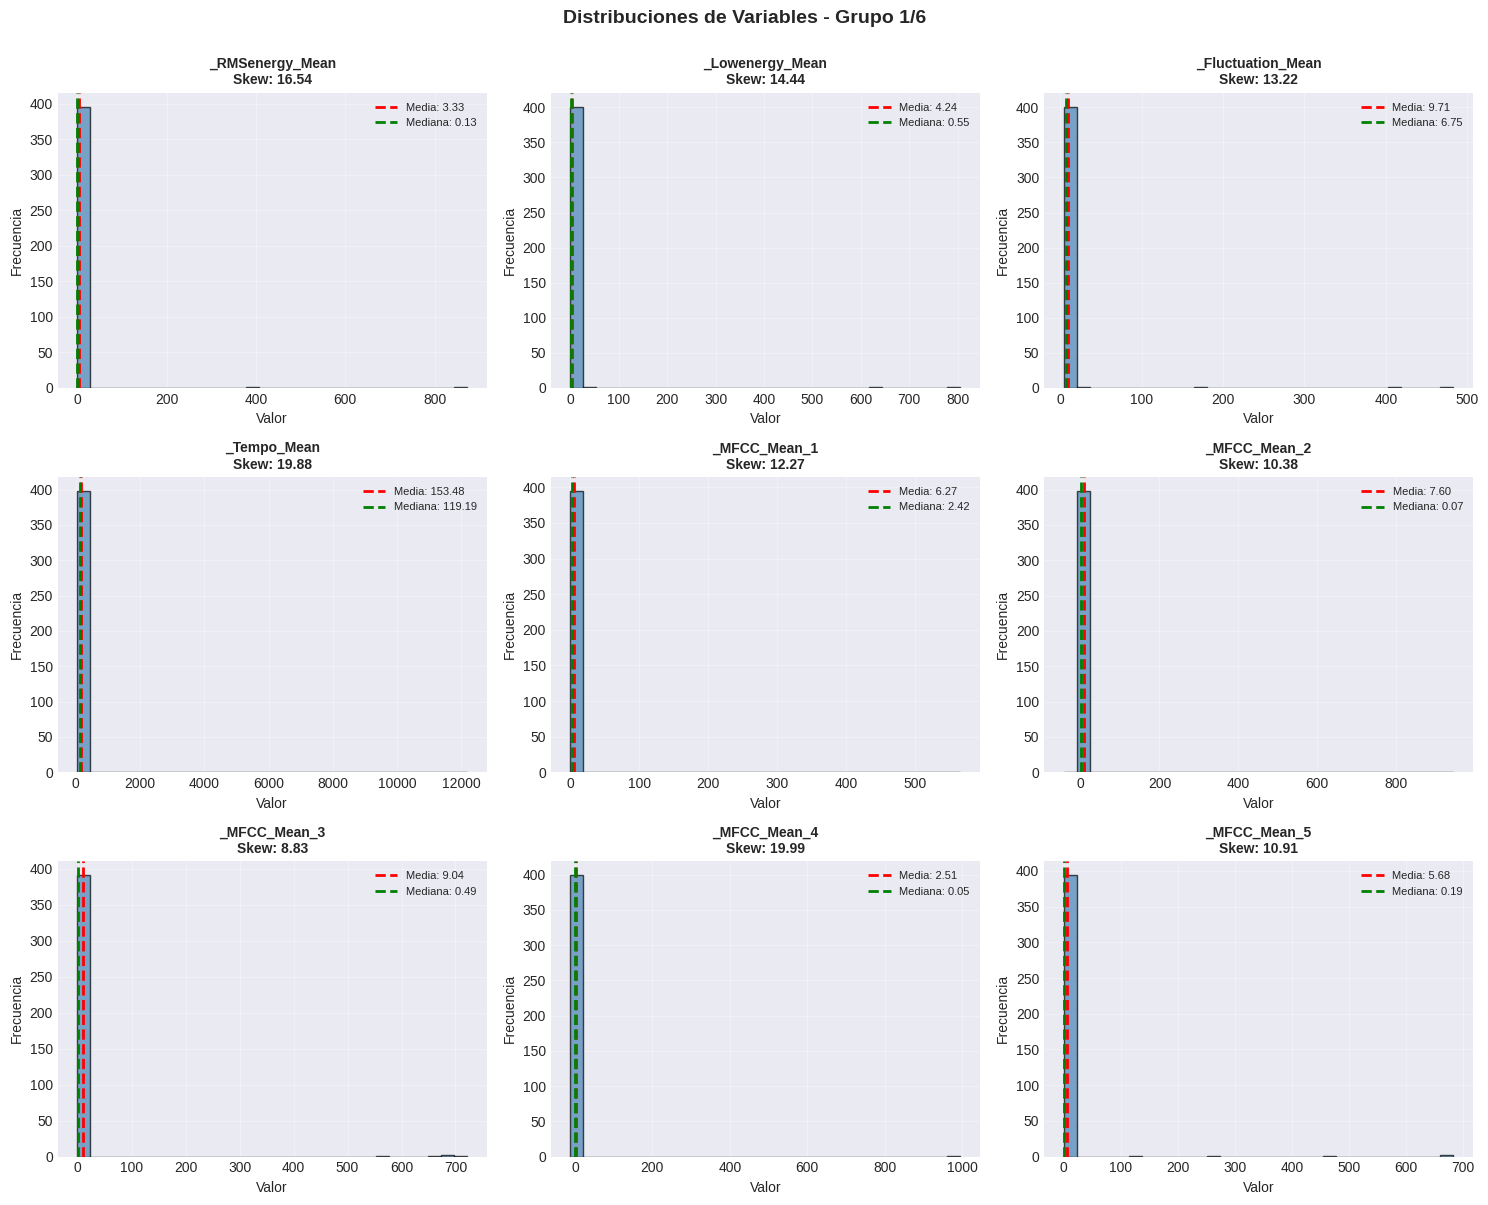

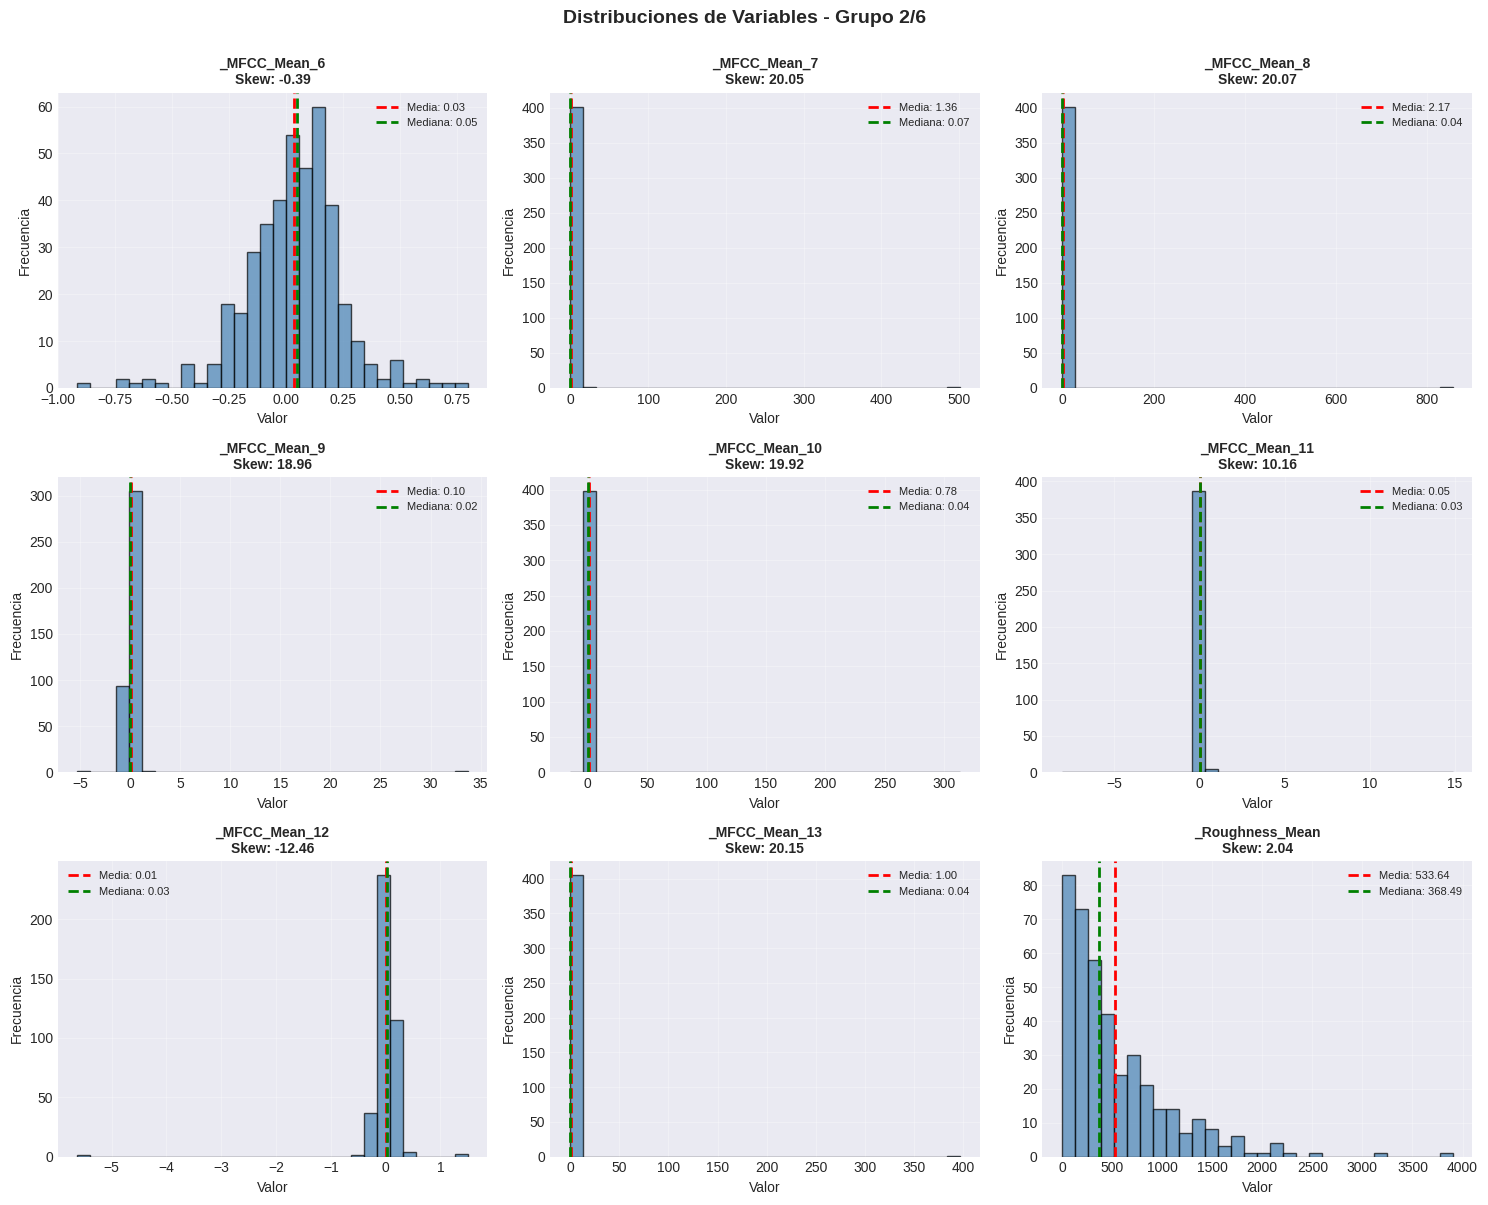

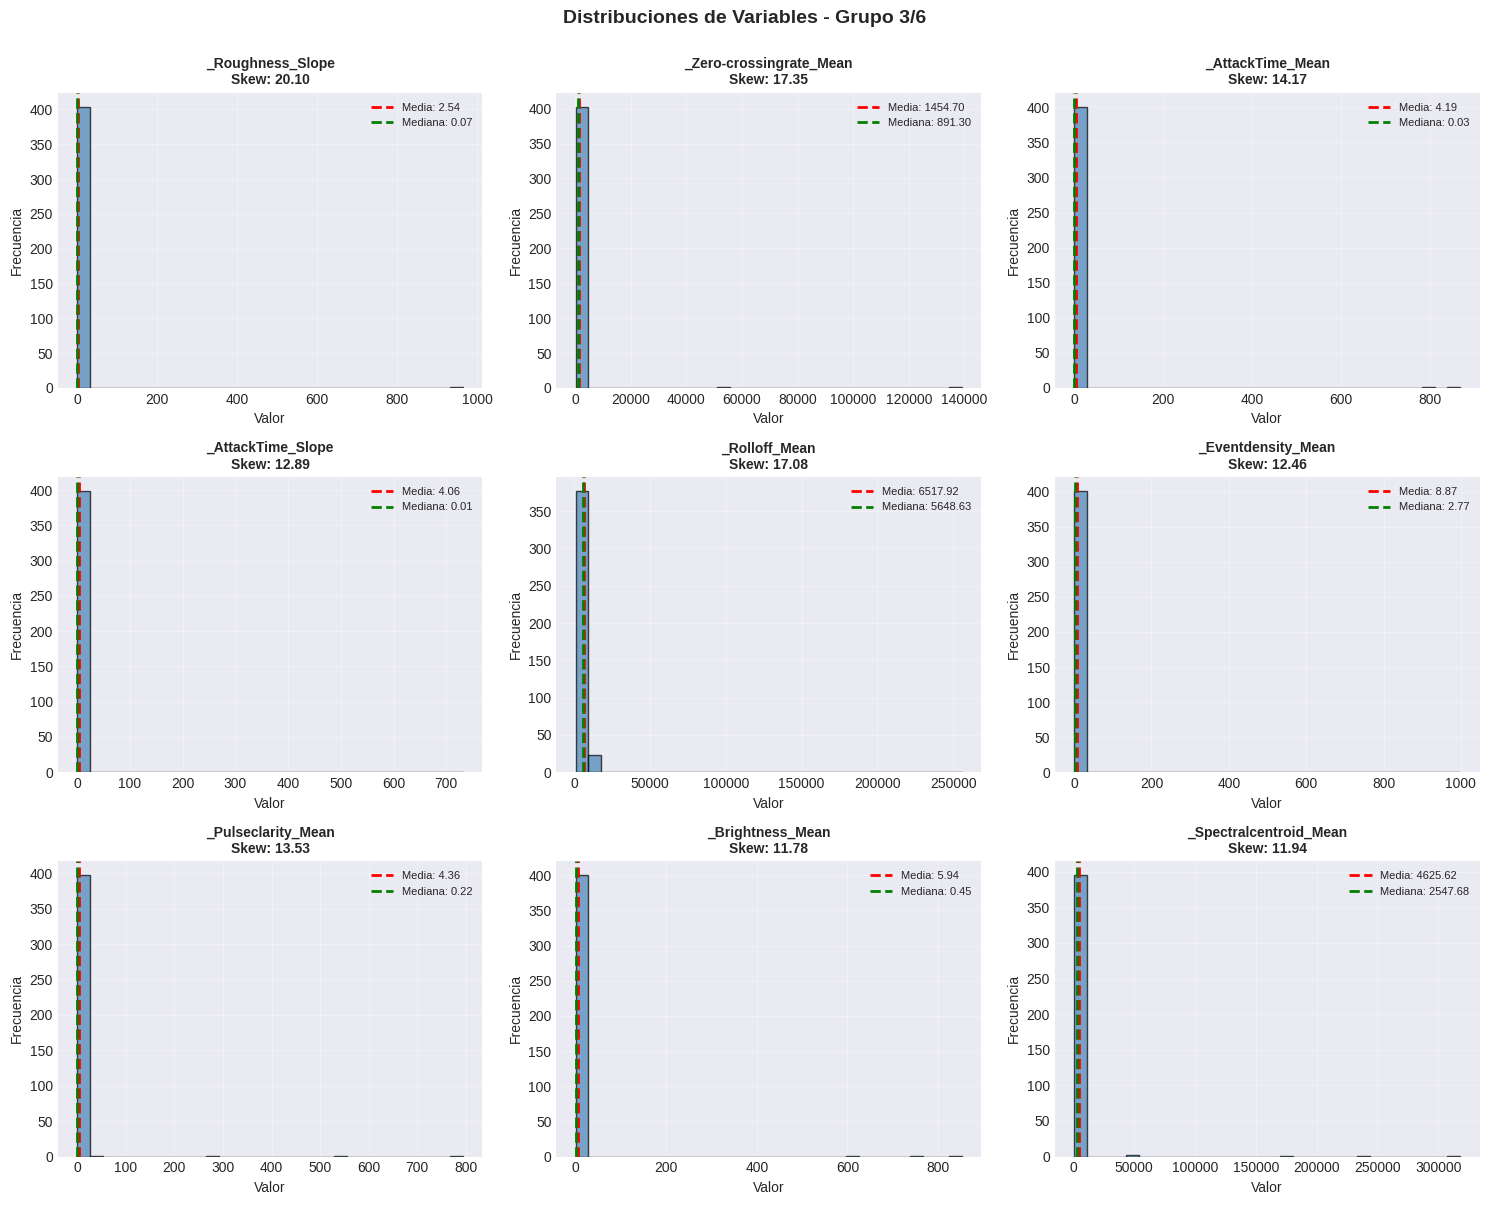

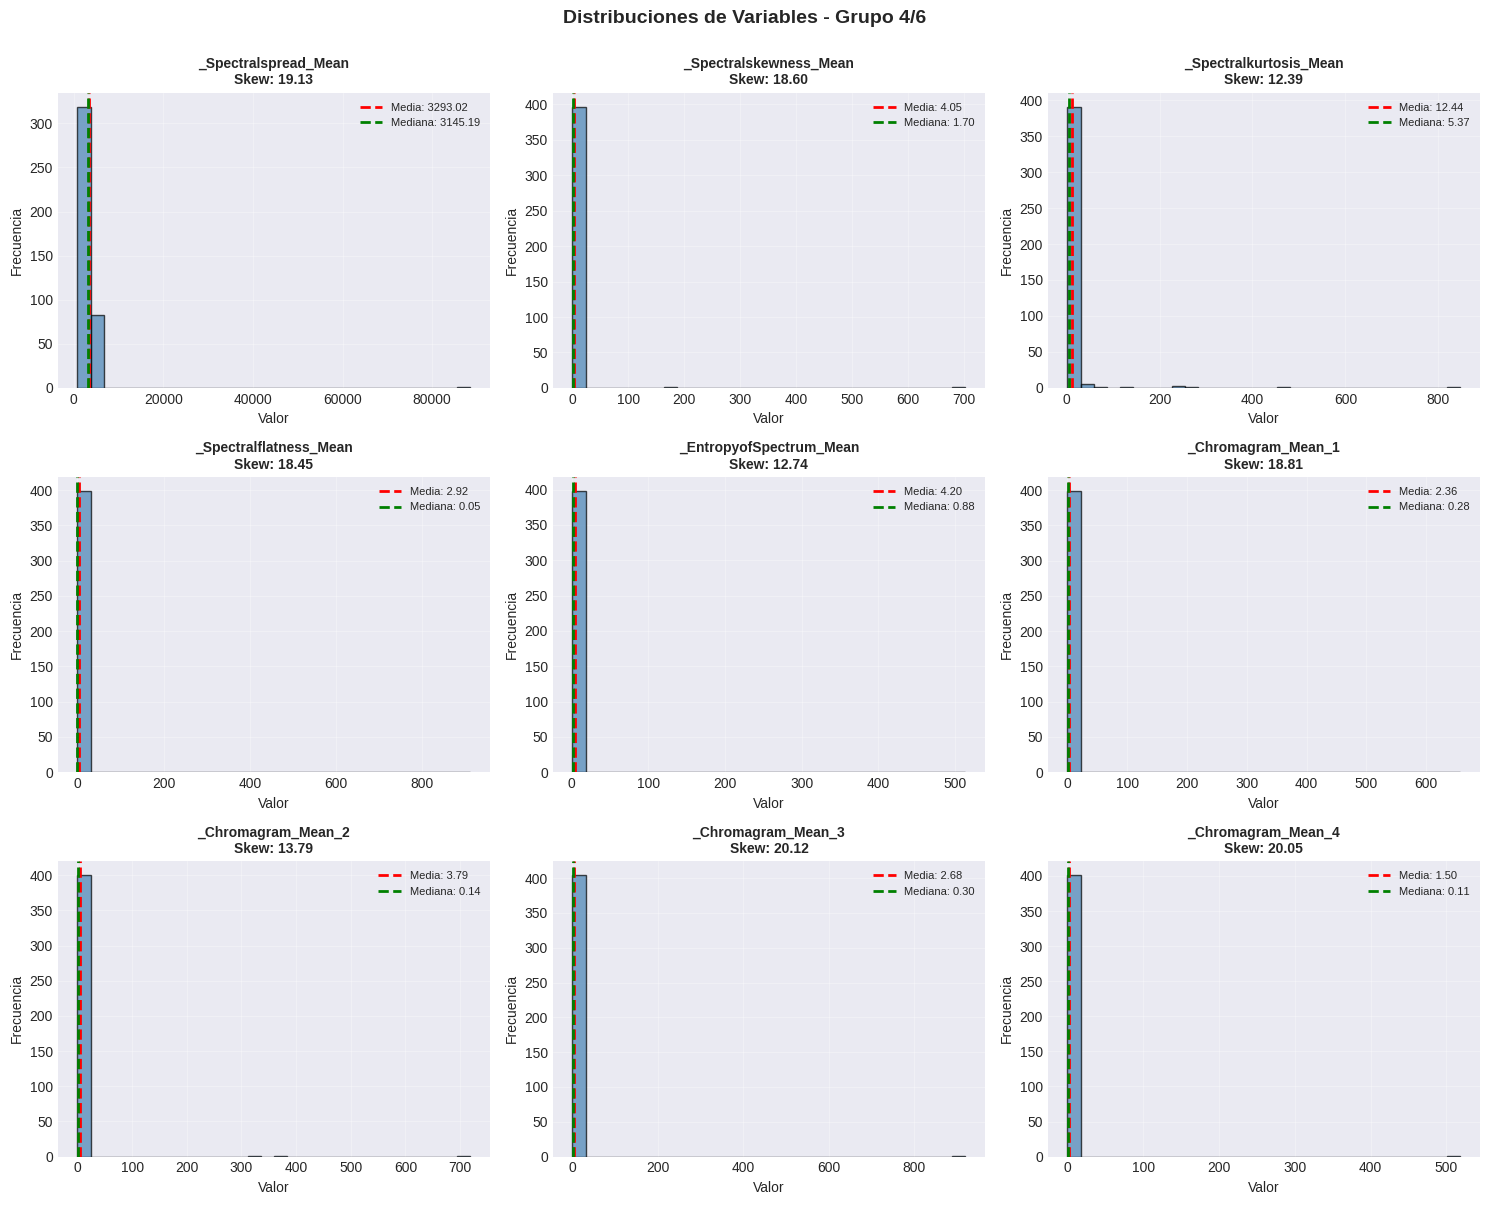

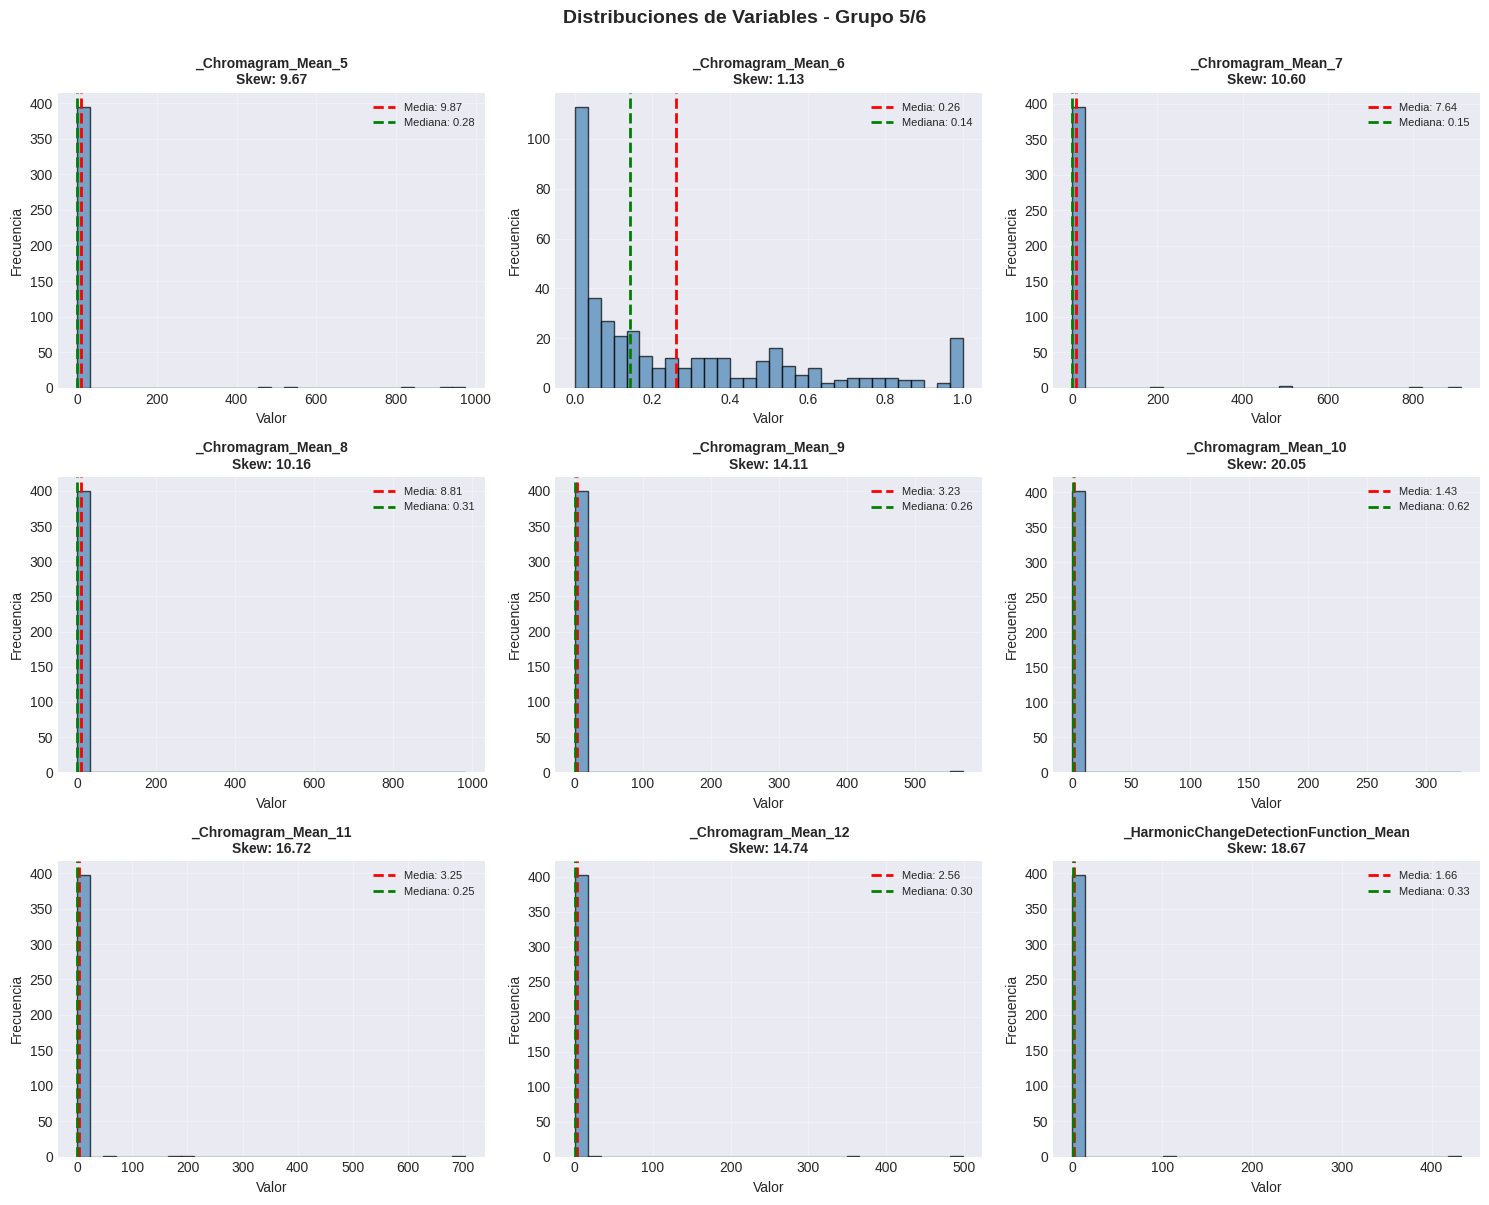

✅ Histogramas generados correctamente


In [10]:
# Visualización de distribuciones - Primera parte
print("\n📊 Generando histogramas de distribuciones...")
print("   (Se mostrarán en grupos para mejor visualización)")

# Dividir columnas en grupos para mejor visualización
cols_per_plot = 9
num_plots = int(np.ceil(len(numeric_cols) / cols_per_plot))

for i in range(num_plots):
    start_idx = i * cols_per_plot
    end_idx = min(start_idx + cols_per_plot, len(numeric_cols))
    cols_subset = numeric_cols[start_idx:end_idx]

    n_cols = 3
    n_rows = int(np.ceil(len(cols_subset) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(cols_subset):
        data = df[col].dropna()
        axes[idx].hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].axvline(data.mean(), color='red', linestyle='--',
                         linewidth=2, label=f'Media: {data.mean():.2f}')
        axes[idx].axvline(data.median(), color='green', linestyle='--',
                         linewidth=2, label=f'Mediana: {data.median():.2f}')
        axes[idx].set_title(f'{col}\nSkew: {data.skew():.2f}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True, alpha=0.3)

    # Ocultar ejes vacíos
    for idx in range(len(cols_subset), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle(f'Distribuciones de Variables - Grupo {i+1}/{num_plots}',
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

print("✅ Histogramas generados correctamente")

In [11]:
# Distribución de la variable objetivo (Class) - DATASET INICIAL
print("="*80)
print("🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CLASS) - DATASET INICIAL")
print("="*80)

# Asegúrate de que 'df_raw' es tu DataFrame original
class_distribution_raw = df_raw['Class'].value_counts()
print("\nConteo de clases:")
print(class_distribution_raw)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis del Dataset Original', fontsize=16, fontweight='bold')

# Gráfico de barras
class_distribution_raw.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frecuencia de Clases', fontsize=14)
axes[0].set_xlabel('Clase de Emoción', fontsize=12)
axes[0].set_ylabel('Número de Muestras', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de pastel
class_distribution_raw.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90,
                            wedgeprops={'edgecolor':'black'},
                            textprops={'fontsize': 10})
axes[1].set_title('Proporción de Clases', fontsize=14)
axes[1].set_ylabel('') # Ocultar la etiqueta del eje y

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CLASS) - DATASET INICIAL

Conteo de clases:
Class
relax      100
sad         99
happy       98
angry       93
 ANGRY       4
 HAPPY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


#### 4.2.c) Imputación de Datos Faltantes

**Justificación del método de imputación:**

Para datos numéricos, utilizamos diferentes estrategias según el contexto:

1. **Imputación por la mediana (método elegido):**
   - ✅ **Ventajas:**
     - Robusta frente a outliers
     - Mantiene la distribución original
     - No se ve afectada por valores extremos
   - ⚠️ **Cuándo usar:** Cuando hay outliers o distribuciones asimétricas

2. **Alternativas consideradas:**
   - **Media:** Sensible a outliers, puede sesgar los datos
   - **Moda:** Útil para variables categóricas o discretas
   - **Forward/Backward Fill:** Para series temporales
   - **KNN Imputer:** Más complejo, útil cuando hay patrones en los datos faltantes

**Criterio de decisión:**
- Si % de nulos < 5%: Imputar con mediana
- Si % de nulos > 40%: Considerar eliminación de la columna
- Si 5% ≤ % nulos ≤ 40%: Evaluar caso por caso

In [12]:
print("="*80)
print("ANÁLISIS Y TRATAMIENTO DE DATOS FALTANTES")
print("="*80)

# Análisis de valores nulos
print("\n📊 Análisis de valores nulos por columna:")
print("-" * 80)

null_analysis = pd.DataFrame({
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2),
    'Total_Valores': len(df)
})

null_analysis = null_analysis[null_analysis['Valores_Nulos'] > 0].sort_values(
    'Porcentaje', ascending=False
)

if len(null_analysis) > 0:
    print(null_analysis)

    # Estrategia de imputación
    print("\n🔧 ESTRATEGIA DE IMPUTACIÓN:")
    print("-" * 80)
    print("\n✅ Método seleccionado: IMPUTACIÓN POR LA MEDIANA")
    print("\nJustificación:")
    print("  1. La mediana es robusta frente a outliers")
    print("  2. Preserva mejor la distribución original de los datos")
    print("  3. Apropiada para variables con distribuciones asimétricas")
    print("  4. No se ve afectada por valores extremos")

    # Aplicar imputación
    print("\n🔄 Aplicando imputación...")
    print("-" * 80)

    for col in null_analysis.index:
        if col in numeric_cols:
            median_value = df[col].median()
            nulls_before = df[col].isnull().sum()
            df[col].fillna(median_value, inplace=True)
            nulls_after = df[col].isnull().sum()
            print(f"  • {col}:")
            print(f"    - Valores imputados: {nulls_before}")
            print(f"    - Mediana utilizada: {median_value:.4f}")
            print(f"    - Nulos restantes: {nulls_after}")

    # Verificación
    print("\n" + "="*80)
    print("VERIFICACIÓN DE IMPUTACIÓN")
    print("="*80)
    remaining_nulls = df.isnull().sum().sum()
    print(f"\n✅ Valores nulos restantes en el dataset: {remaining_nulls}")

    if remaining_nulls == 0:
        print("\n🎉 ¡Imputación completada exitosamente! No quedan valores nulos.")

else:
    print("✅ No se encontraron valores nulos en el dataset")

ANÁLISIS Y TRATAMIENTO DE DATOS FALTANTES

📊 Análisis de valores nulos por columna:
--------------------------------------------------------------------------------
                                                Valores_Nulos  Porcentaje  \
_MFCC_Mean_3                                               12       2.940   
_MFCC_Mean_11                                              12       2.940   
_MFCC_Mean_12                                              11       2.700   
_RMSenergy_Mean                                            10       2.450   
_Tempo_Mean                                                 9       2.210   
_MFCC_Mean_5                                                9       2.210   
_Spectralskewness_Mean                                      9       2.210   
_HarmonicChangeDetectionFunction_Mean                       9       2.210   
_Chromagram_Mean_5                                          8       1.960   
_MFCC_Mean_4                                                8    

🎨 VISUALIZACIÓN MEJORADA DE DATOS FALTANTES (ANTES DE LA IMPUTACIÓN)


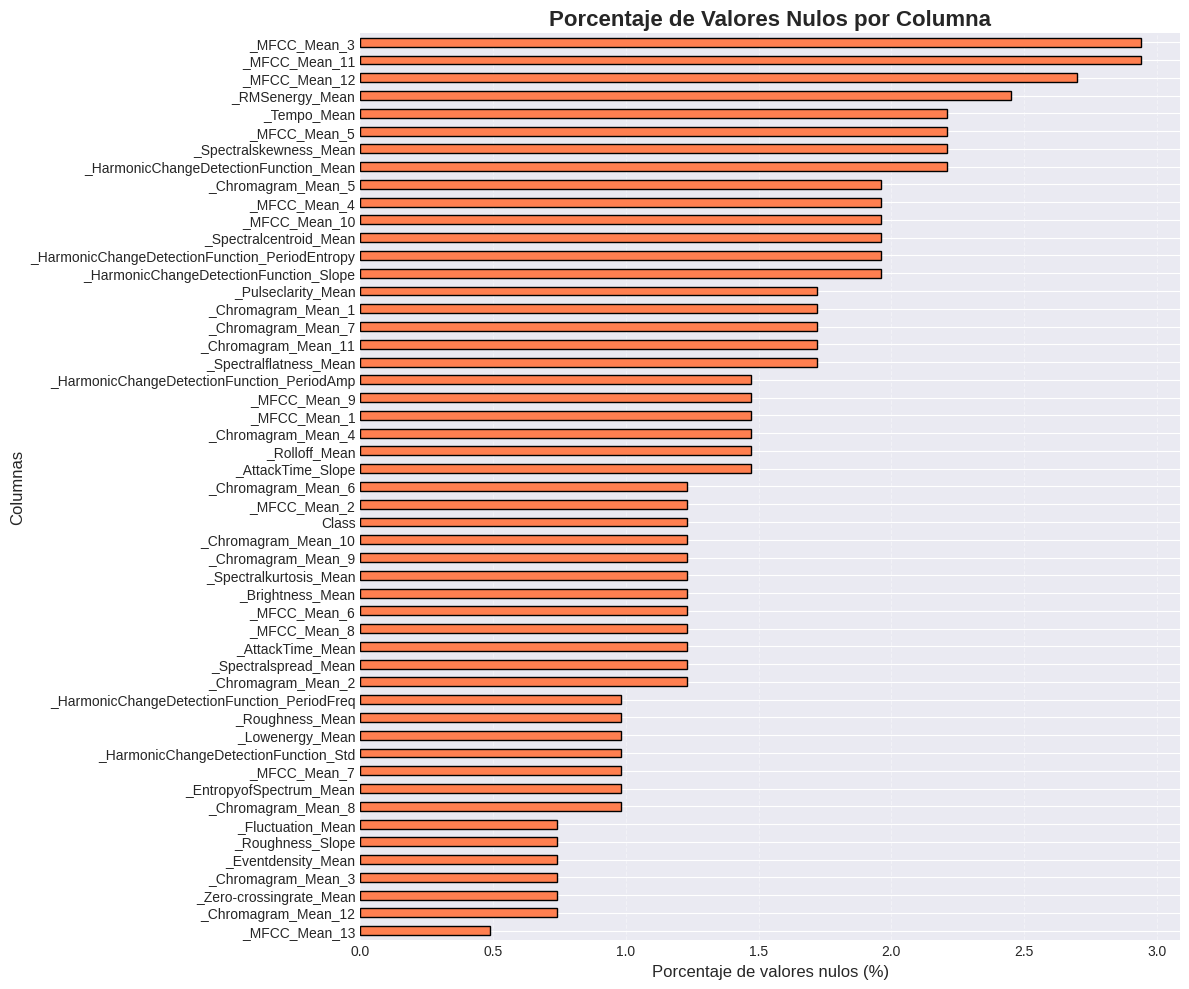

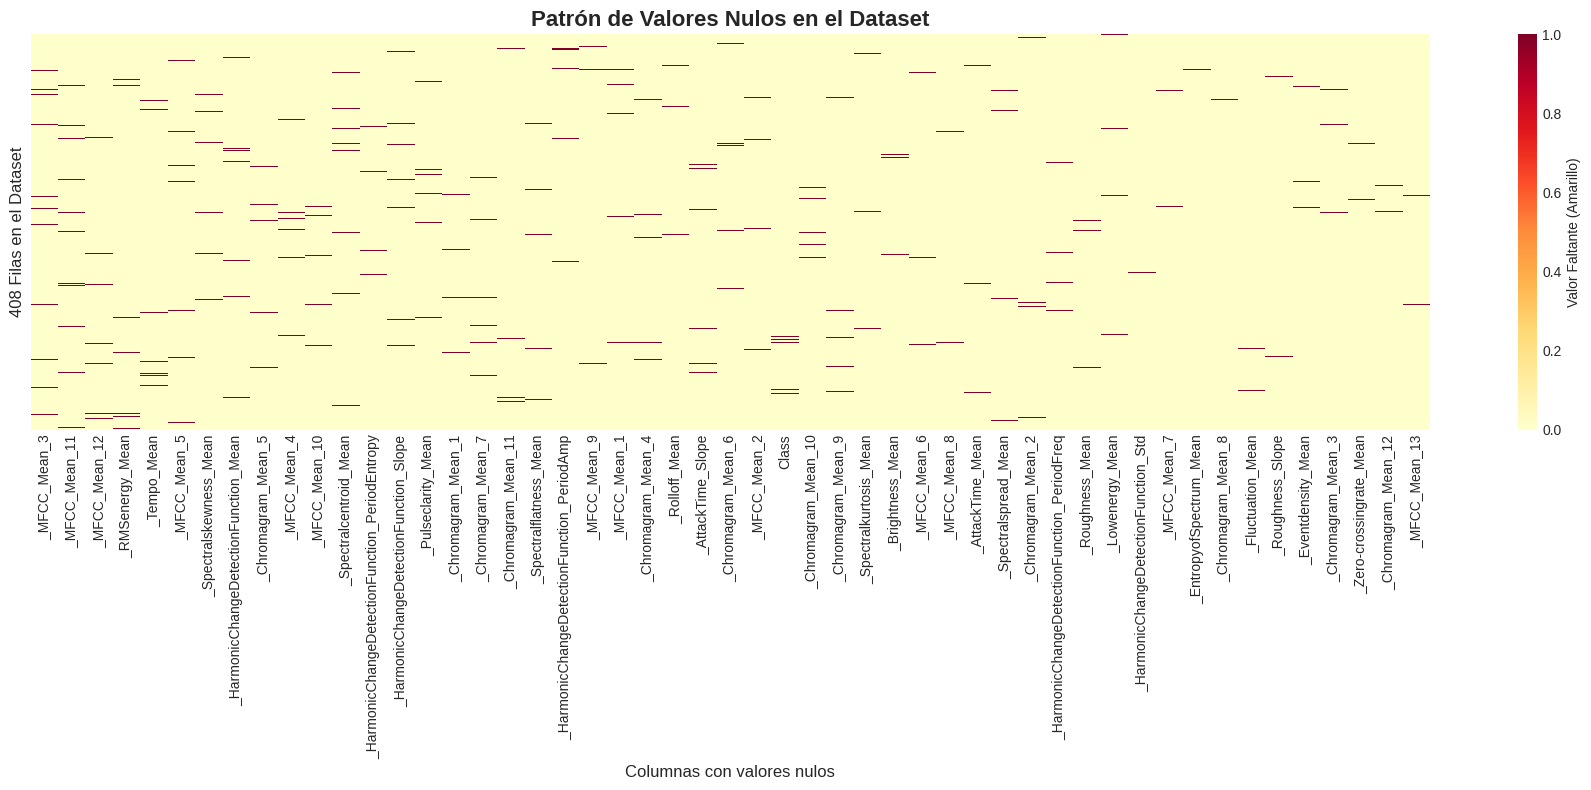

In [13]:
print("="*80)
print("🎨 VISUALIZACIÓN MEJORADA DE DATOS FALTANTES (ANTES DE LA IMPUTACIÓN)")
print("="*80)

if len(null_analysis) > 0:
    # --- Gráfico 1: Porcentaje de Valores Nulos (Mejorado) ---
    plt.figure(figsize=(12, 10)) # Aumentamos el tamaño para mayor claridad

    # Usamos el DataFrame 'null_analysis' calculado en la celda anterior
    null_analysis['Porcentaje'].plot(kind='barh', color='coral', edgecolor='black')

    plt.title('Porcentaje de Valores Nulos por Columna', fontsize=16, fontweight='bold')
    plt.xlabel('Porcentaje de valores nulos (%)', fontsize=12)
    plt.ylabel('Columnas', fontsize=12)
    plt.grid(True, alpha=0.4, axis='x', linestyle='--')
    plt.gca().invert_yaxis() # Muestra la barra más grande arriba
    plt.tight_layout()
    plt.show()
    print('\n')

    # --- Gráfico 2: Mapa de Calor de Nulos (Mejorado) ---
    plt.figure(figsize=(18, 8)) # Aumentamos el tamaño para el mapa de calor

    cols_with_nulls = null_analysis.index.tolist()

    sns.heatmap(df_raw[cols_with_nulls].isnull(), cbar=True, cmap='YlOrRd',
                yticklabels=False, cbar_kws={'label': 'Valor Faltante (Amarillo)'})

    plt.title('Patrón de Valores Nulos en el Dataset', fontsize=16, fontweight='bold')
    plt.xlabel('Columnas con valores nulos', fontsize=12)
    plt.ylabel(f'{len(df_raw)} Filas en el Dataset', fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print("✅ No hay valores nulos que visualizar.")

#### 4.2.d) Boxplots y Análisis de Límites

**Justificación del uso de Boxplots:**

Los boxplots (diagramas de caja) son herramientas visuales que muestran:

1. **Componentes del boxplot:**
   - **Caja:** Contiene el 50% central de los datos (Q1 a Q3)
   - **Línea central:** Mediana (Q2)
   - **Bigotes:** Se extienden hasta 1.5 × IQR desde los cuartiles
   - **Puntos fuera de bigotes:** Posibles outliers

2. **Métricas del Rango Intercuartílico (IQR):**
   - IQR = Q3 - Q1
   - Límite inferior = Q1 - 1.5 × IQR
   - Límite superior = Q3 + 1.5 × IQR
   - **Outliers leves:** Fuera de los bigotes pero < 3 × IQR
   - **Outliers extremos:** > 3 × IQR desde los cuartiles

3. **Ventajas:**
   - Visualización rápida de la dispersión
   - Identificación de outliers
   - Comparación entre variables
   - Detección de asimetría

ANÁLISIS DE OUTLIERS CON BOXPLOTS Y MÉTODO IQR

📊 Análisis detallado de outliers por variable:
--------------------------------------------------------------------------------
                                      Variable  N_Outliers  Porcentaje  Límite_Inferior  Límite_Superior      IQR
                              _AttackTime_Mean          40       9.804            0.008            0.048    0.010
                        _Spectralkurtosis_Mean          38       9.314           -2.117           14.104    4.055
                            _Chromagram_Mean_4          24       5.882           -0.427            0.760    0.297
                            _Chromagram_Mean_7          22       5.392           -0.539            0.974    0.378
                        _Spectralskewness_Mean          21       5.147            0.078            3.445    0.842
                                  _MFCC_Mean_1          21       5.147            0.573            4.281    0.927
                          

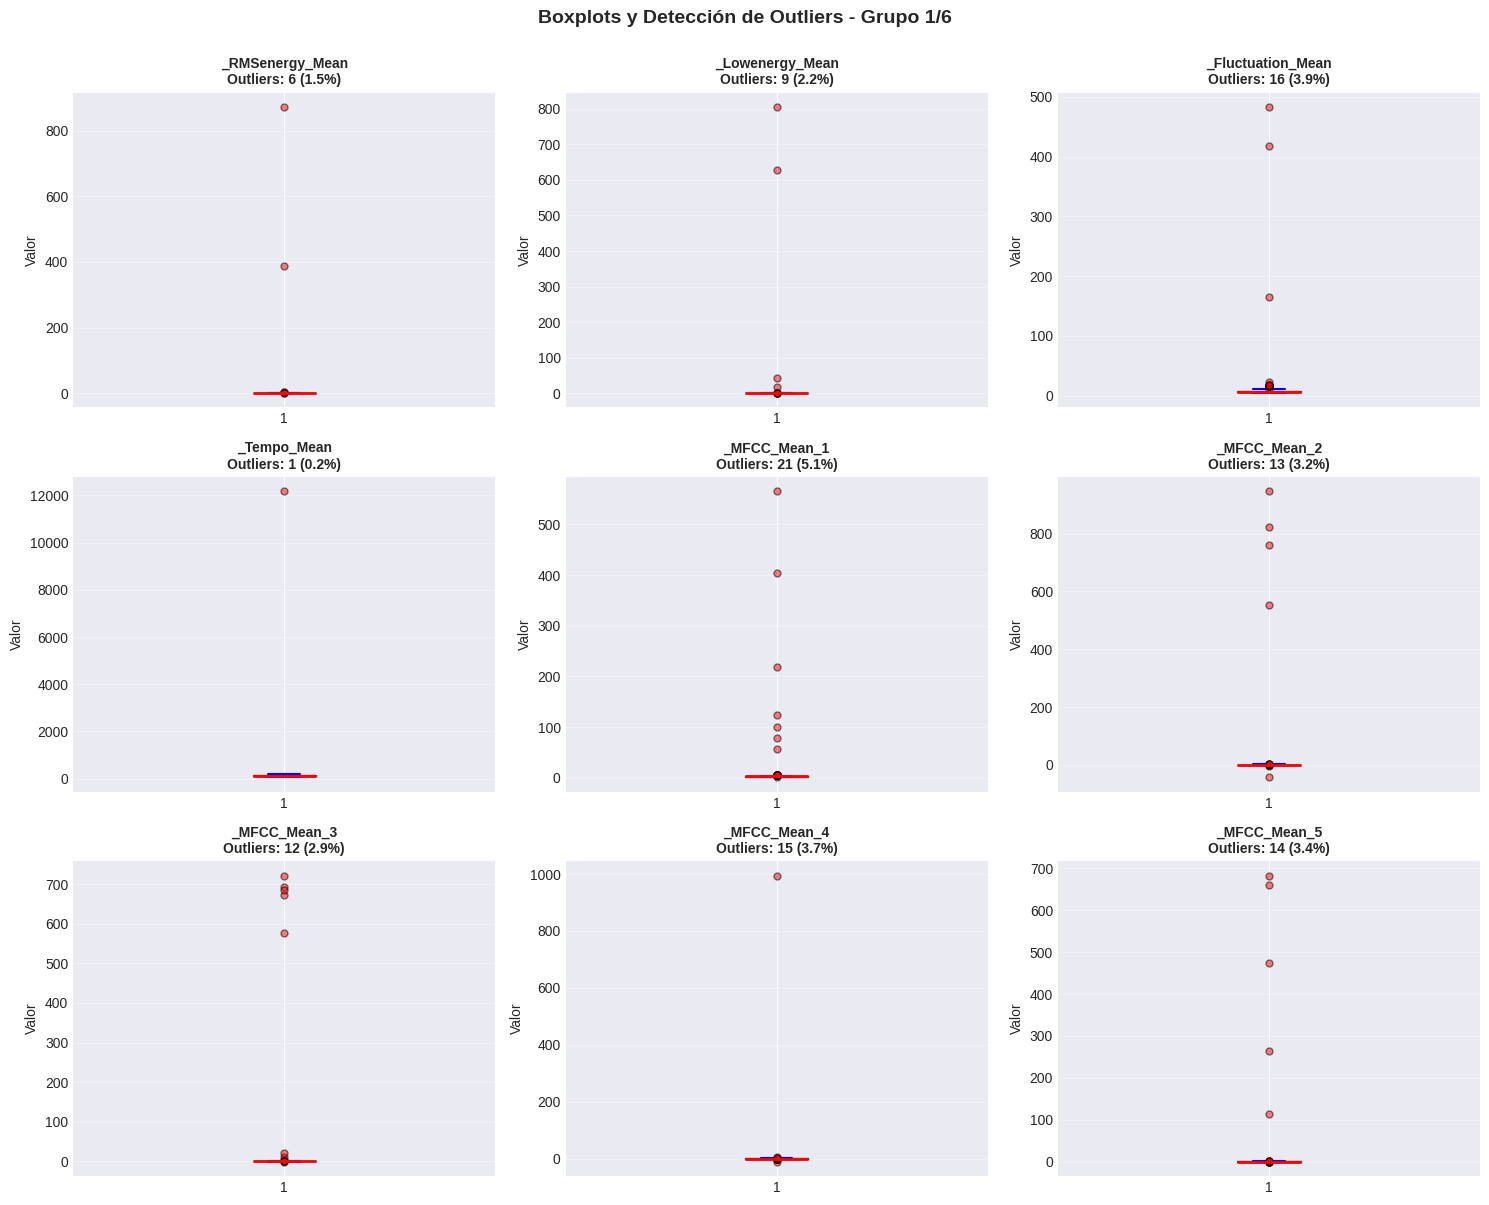

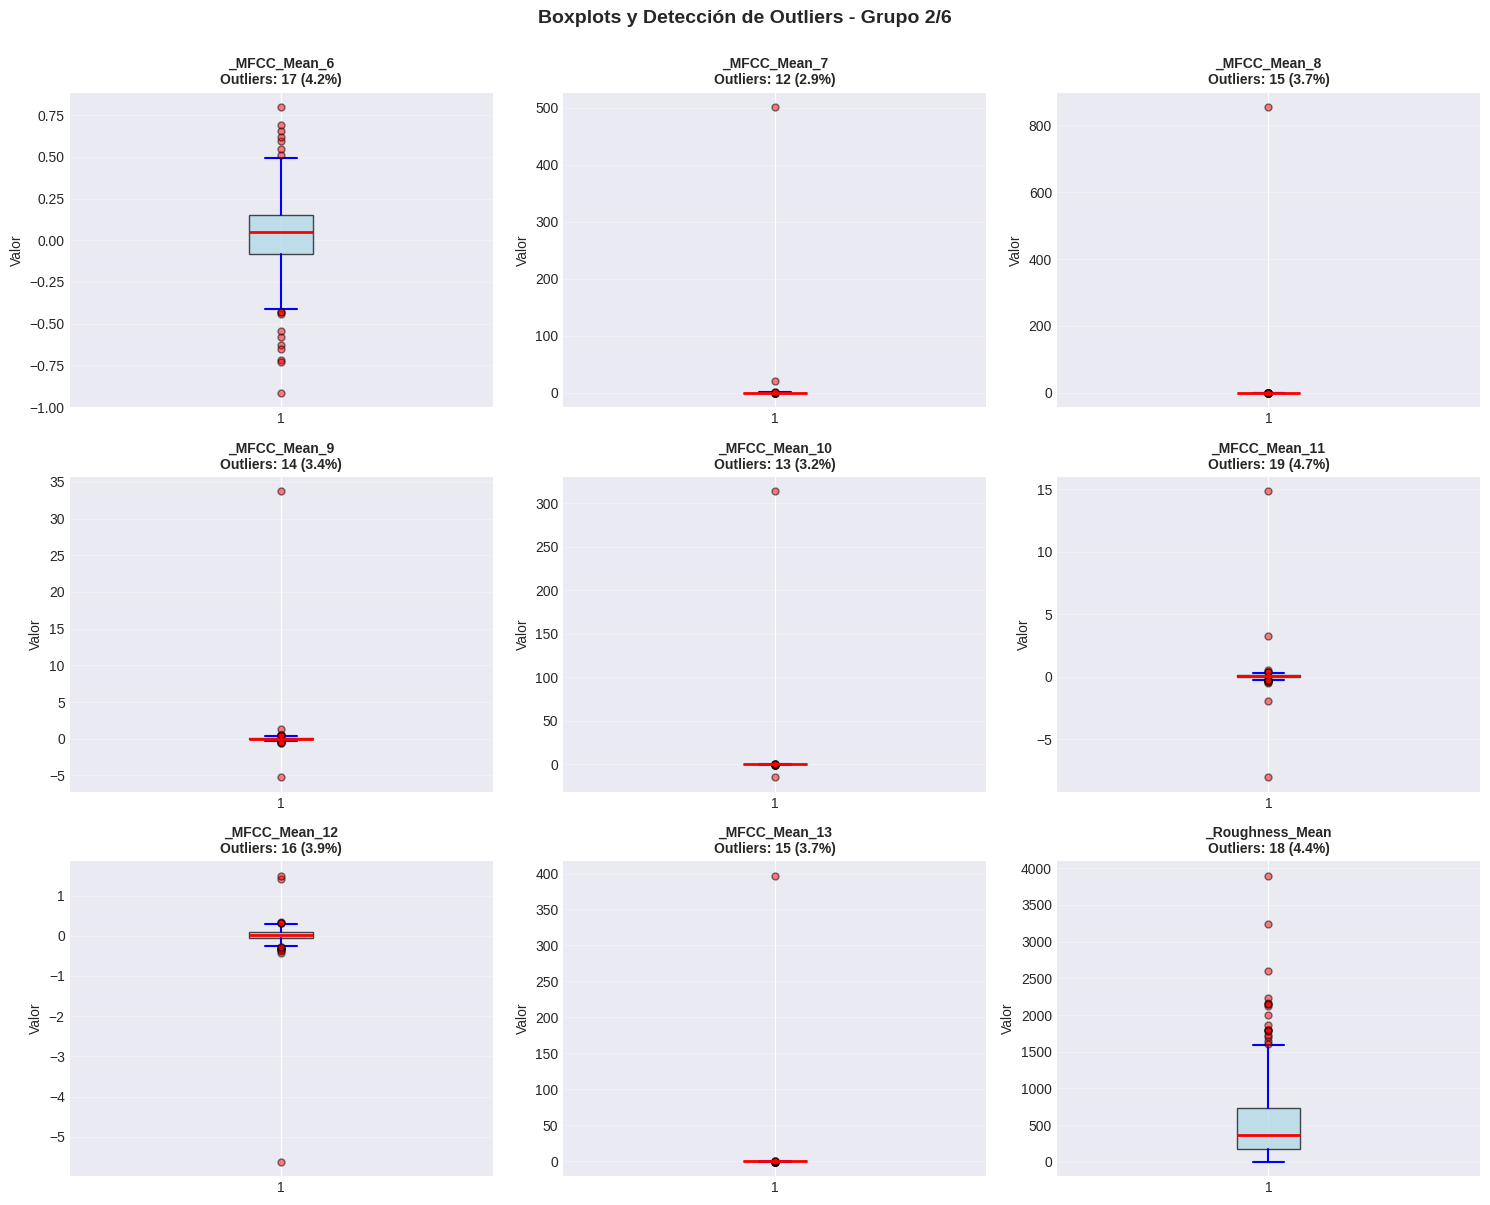

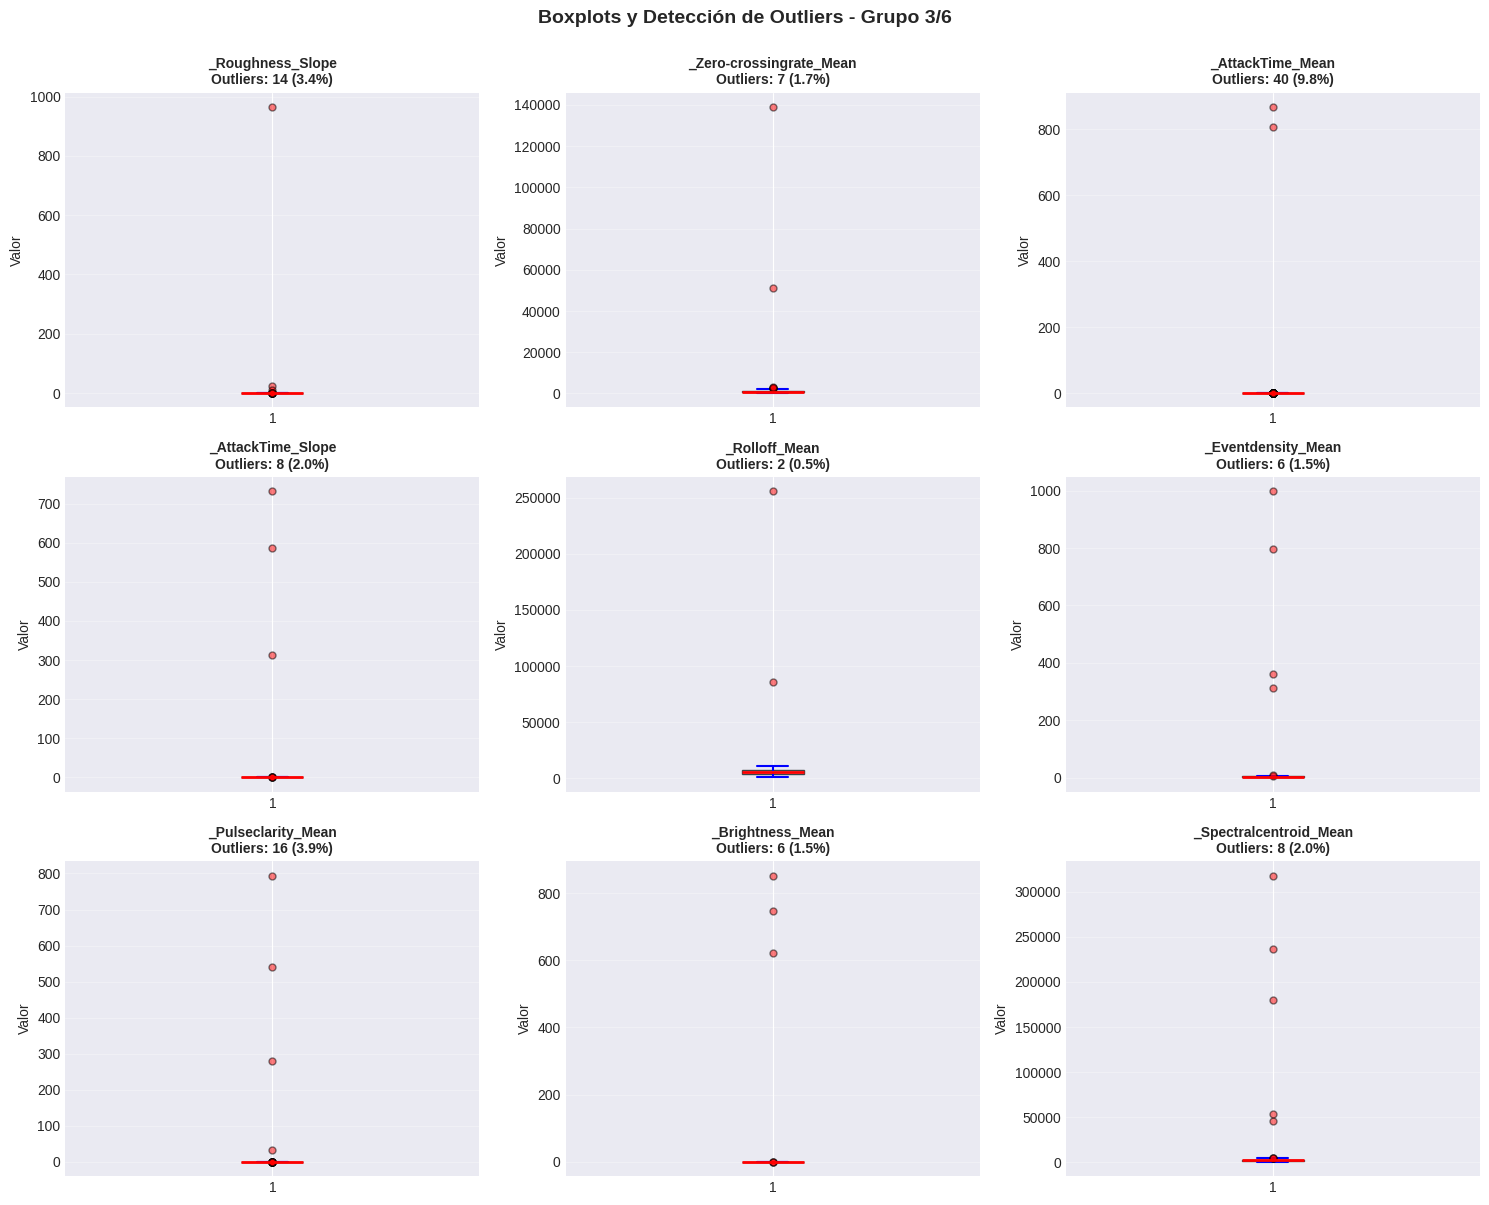

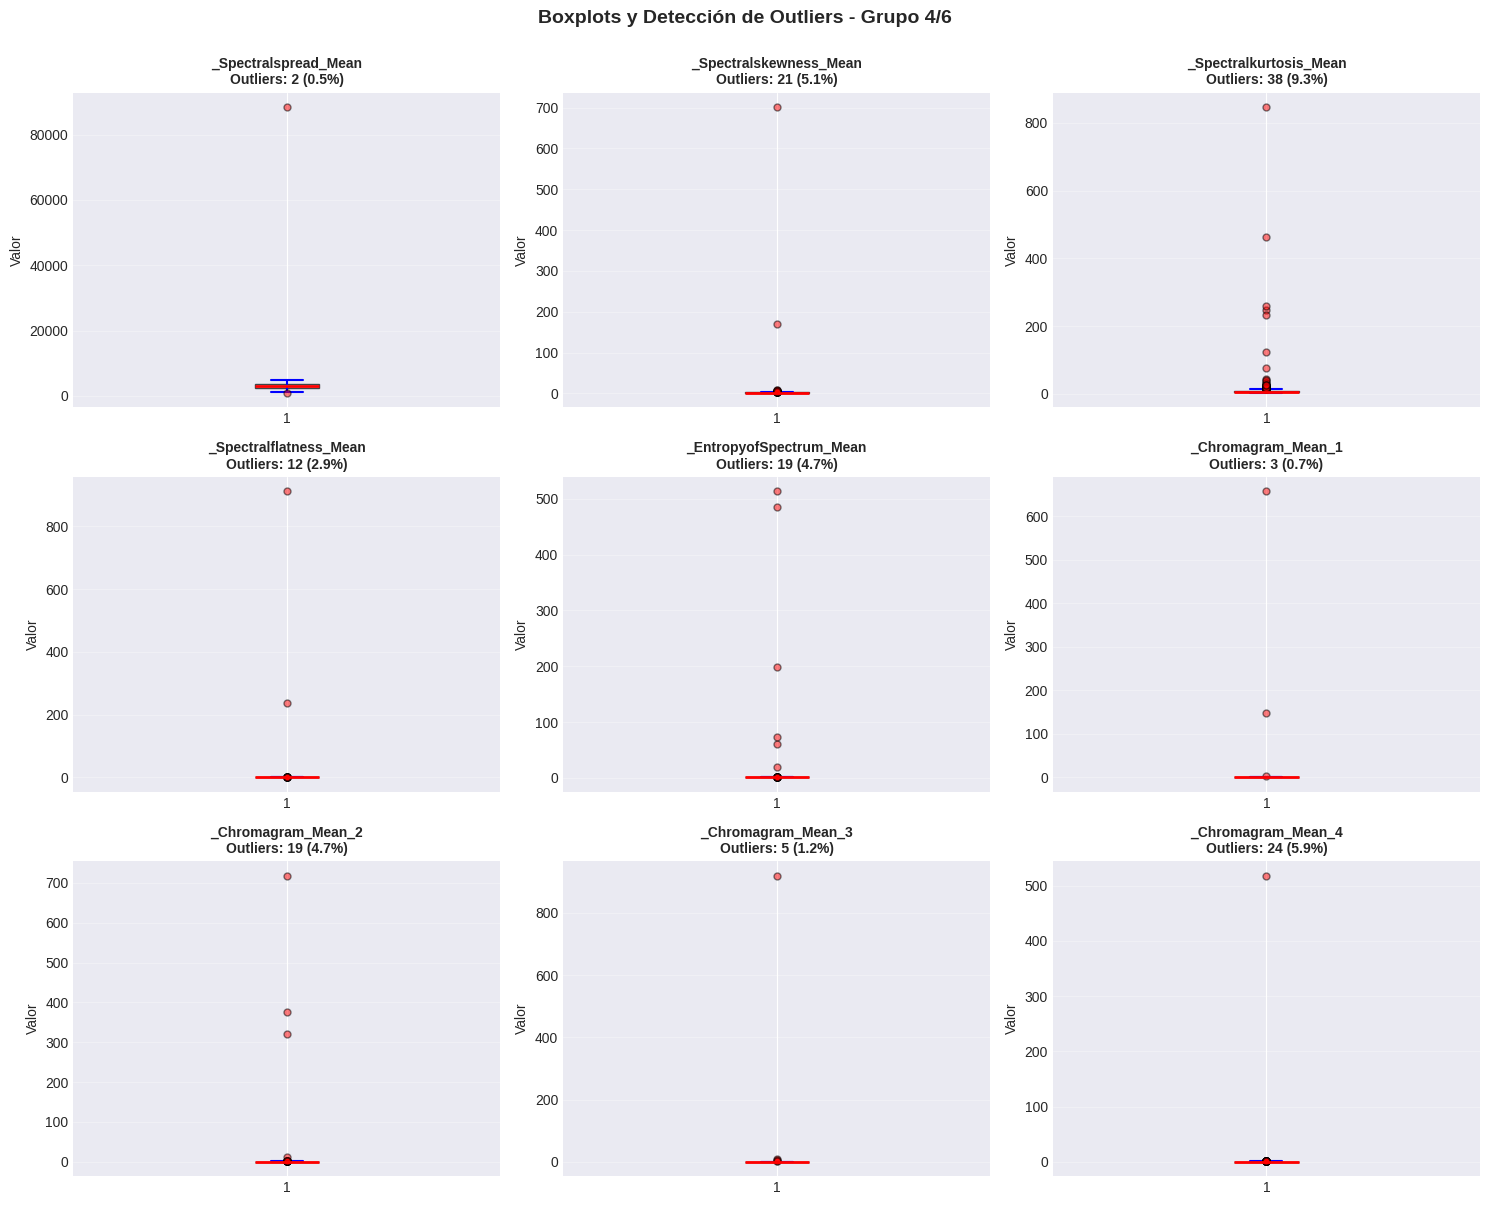


✅ Análisis de outliers completado


In [14]:
print("="*80)
print("ANÁLISIS DE OUTLIERS CON BOXPLOTS Y MÉTODO IQR")
print("="*80)

# Función para detectar outliers con IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# Análisis de outliers por columna
print("\n📊 Análisis detallado de outliers por variable:")
print("-" * 80)

outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper, iqr = detect_outliers_iqr(df[col])
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df) * 100)

    outlier_summary.append({
        'Variable': col,
        'N_Outliers': n_outliers,
        'Porcentaje': pct_outliers,
        'Límite_Inferior': lower,
        'Límite_Superior': upper,
        'IQR': iqr
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df[outlier_df['N_Outliers'] > 0].sort_values(
    'Porcentaje', ascending=False
)

if len(outlier_df) > 0:
    print(outlier_df.to_string(index=False))

    print(f"\n📈 Resumen de outliers:")
    print(f"  • Variables con outliers: {len(outlier_df)} de {len(numeric_cols)}")
    print(f"  • Total de outliers detectados: {outlier_df['N_Outliers'].sum()}")
    print(f"  • Porcentaje medio de outliers: {outlier_df['Porcentaje'].mean():.2f}%")
else:
    print("✅ No se detectaron outliers en ninguna variable")

# Visualización de boxplots
print("\n📊 Generando boxplots para visualización de outliers...")

# Dividir en grupos para mejor visualización
cols_per_plot = 9
num_plots = int(np.ceil(len(numeric_cols) / cols_per_plot))

for i in range(num_plots):
    start_idx = i * cols_per_plot
    end_idx = min(start_idx + cols_per_plot, len(numeric_cols))
    cols_subset = numeric_cols[start_idx:end_idx]

    n_cols = 3
    n_rows = int(np.ceil(len(cols_subset) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(cols_subset):
        # Boxplot
        bp = axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', alpha=0.7),
                               medianprops=dict(color='red', linewidth=2),
                               whiskerprops=dict(color='blue', linewidth=1.5),
                               capprops=dict(color='blue', linewidth=1.5),
                               flierprops=dict(marker='o', markerfacecolor='red',
                                             markersize=5, alpha=0.5))

        # Información de outliers
        outliers, _, _, _ = detect_outliers_iqr(df[col])
        n_out = len(outliers)
        pct_out = (n_out / len(df) * 100)

        axes[idx].set_title(f'{col}\nOutliers: {n_out} ({pct_out:.1f}%)',
                           fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Valor')
        axes[idx].grid(True, alpha=0.3, axis='y')

    # Ocultar ejes vacíos
    for idx in range(len(cols_subset), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle(f'Boxplots y Detección de Outliers - Grupo {i+1}/{num_plots}',
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

print("\n✅ Análisis de outliers completado")

#### 4.2.e) Imputación de Datos Atípicos (Outliers)

**Justificación del tratamiento de outliers:**

**¿Por qué tratar los outliers?**
- Pueden sesgar el análisis estadístico
- Afectan modelos de ML sensibles (regresión lineal, KNN, etc.)
- Pueden ser errores de medición o entrada de datos

**Estrategias de tratamiento:**

1. **Eliminación (opción más agresiva):**
   - ❌ Pérdida de información
   - ❌ Reduce el tamaño del dataset
   - ✅ Simple y efectivo si hay pocos outliers

2. **Winsorización (MÉTODO ELEGIDO):**
   - ✅ Reemplaza outliers por valores en los percentiles (ej: 5% y 95%)
   - ✅ Mantiene el tamaño del dataset
   - ✅ Reduce el impacto sin eliminar datos
   - ⚠️ Puede introducir sesgo si hay muchos outliers

3. **Transformación logarítmica:**
   - ✅ Útil para distribuciones muy sesgadas
   - ⚠️ Cambia la interpretación de los datos

4. **Capping (límites fijos):**
   - Reemplazar valores fuera de IQR por los límites
   - Similar a winsorización pero basado en IQR

**Criterio de decisión para nuestro caso:**
- Usamos **Winsorización al percentil 1% y 99%**
- Más conservador que 5%-95%
- Mantiene más información original
- Apropiado para características de audio que pueden tener valores extremos válidos

TRATAMIENTO DE OUTLIERS - WINSORIZACIÓN

📋 MÉTODO SELECCIONADO: Winsorización (Percentiles 1% y 99%)
--------------------------------------------------------------------------------

✅ Justificación del método:
  1. Mantiene el tamaño del dataset (no elimina filas)
  2. Reduce el impacto de valores extremos sin perder información
  3. Percentiles 1%-99% son conservadores (mantienen 98% de datos originales)
  4. Apropiado para características de audio con valores extremos válidos
  5. Mejora el rendimiento de modelos sensibles a outliers

🔄 Aplicando winsorización a variables numéricas...
--------------------------------------------------------------------------------
                                      Variable  Valores_Modificados  Porcentaje  Límite_Inferior_P1  Límite_Superior_P99
                               _RMSenergy_Mean                   10       2.451               0.024                1.834
                               _Lowenergy_Mean                   10       2.451   

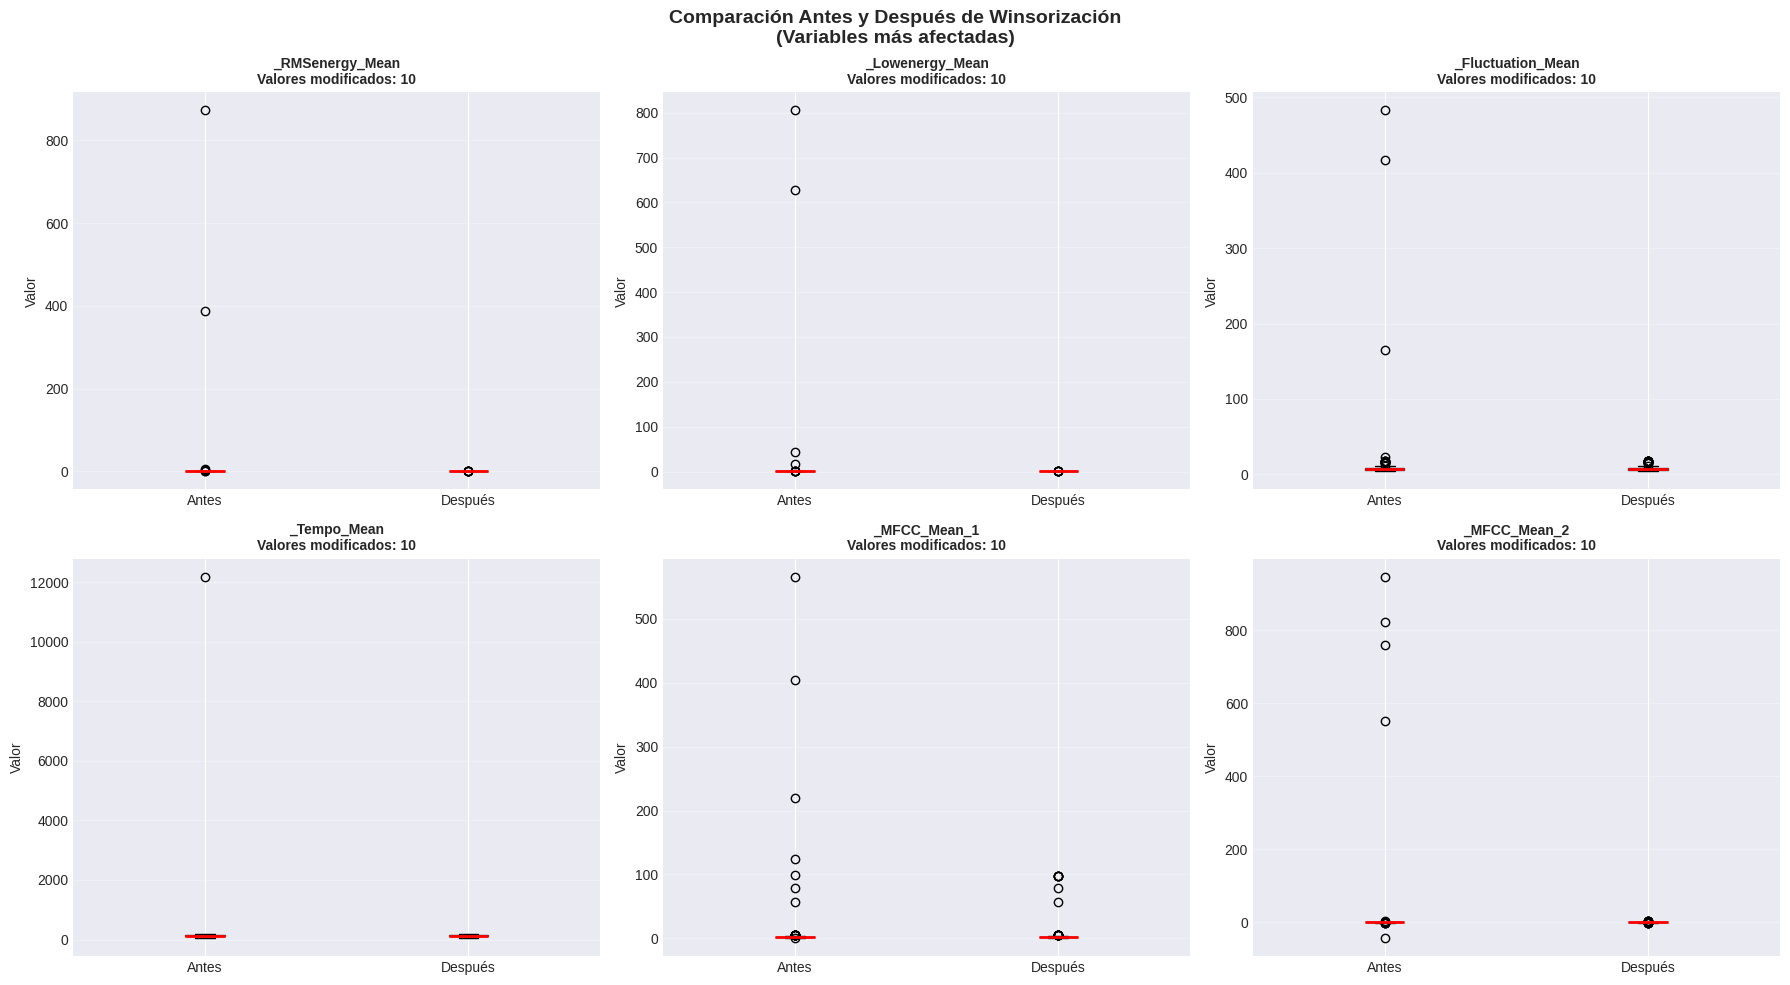


✅ Tratamiento de outliers completado exitosamente


In [15]:
print("="*80)
print("TRATAMIENTO DE OUTLIERS - WINSORIZACIÓN")
print("="*80)

print("\n📋 MÉTODO SELECCIONADO: Winsorización (Percentiles 1% y 99%)")
print("-" * 80)
print("\n✅ Justificación del método:")
print("  1. Mantiene el tamaño del dataset (no elimina filas)")
print("  2. Reduce el impacto de valores extremos sin perder información")
print("  3. Percentiles 1%-99% son conservadores (mantienen 98% de datos originales)")
print("  4. Apropiado para características de audio con valores extremos válidos")
print("  5. Mejora el rendimiento de modelos sensibles a outliers")

# Crear copia antes del tratamiento
df_before_winsor = df.copy()

print("\n🔄 Aplicando winsorización a variables numéricas...")
print("-" * 80)

winsor_summary = []

for col in numeric_cols:
    # Calcular percentiles
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)

    # Contar valores que serán modificados
    n_below = (df[col] < p1).sum()
    n_above = (df[col] > p99).sum()
    total_modified = n_below + n_above

    if total_modified > 0:
        # Aplicar winsorización
        df[col] = df[col].clip(lower=p1, upper=p99)

        winsor_summary.append({
            'Variable': col,
            'Valores_Modificados': total_modified,
            'Porcentaje': (total_modified / len(df) * 100),
            'Límite_Inferior_P1': p1,
            'Límite_Superior_P99': p99
        })

# Mostrar resumen
if len(winsor_summary) > 0:
    winsor_df = pd.DataFrame(winsor_summary).sort_values(
        'Valores_Modificados', ascending=False
    )
    print(winsor_df.to_string(index=False))

    print(f"\n📊 Resumen de winsorización:")
    print(f"  • Variables tratadas: {len(winsor_df)} de {len(numeric_cols)}")
    print(f"  • Total de valores modificados: {winsor_df['Valores_Modificados'].sum()}")
    print(f"  • Porcentaje medio modificado: {winsor_df['Porcentaje'].mean():.2f}%")
else:
    print("✅ No se encontraron valores extremos para modificar")

# Comparación antes y después
print("\n" + "="*80)
print("COMPARACIÓN ANTES Y DESPUÉS DE WINSORIZACIÓN")
print("="*80)

# Seleccionar algunas variables para comparar
if len(winsor_df) > 0:
    # Top 6 variables más afectadas
    top_affected = winsor_df.head(6)['Variable'].tolist()

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(top_affected):
        # Boxplot comparativo
        data_before = df_before_winsor[col].dropna()
        data_after = df[col].dropna()

        bp = axes[idx].boxplot([data_before, data_after],
                               labels=['Antes', 'Después'],
                               patch_artist=True,
                               boxprops=dict(facecolor='lightblue', alpha=0.7),
                               medianprops=dict(color='red', linewidth=2))

        # Colorear cajas
        bp['boxes'][0].set_facecolor('lightcoral')
        bp['boxes'][1].set_facecolor('lightgreen')

        axes[idx].set_title(f'{col}\nValores modificados: {int(winsor_df[winsor_df["Variable"]==col]["Valores_Modificados"].values[0])}',
                           fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Valor')
        axes[idx].grid(True, alpha=0.3, axis='y')

    plt.suptitle('Comparación Antes y Después de Winsorización\n(Variables más afectadas)',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n✅ Tratamiento de outliers completado exitosamente")

### 4.3. Análisis Bivariante

El análisis bivariante examina las relaciones entre pares de variables.

---

#### 4.3.a) Análisis de Correlación

**Justificación del análisis de correlación:**

**¿Por qué es importante?**
- Identifica relaciones lineales entre variables
- Detecta multicolinealidad (correlación alta entre predictores)
- Ayuda en la selección de características
- Revela patrones ocultos en los datos

**Coeficiente de Correlación de Pearson (r):**
- **Rango:** -1 a +1
- **Interpretación:**
  - r = 1: Correlación positiva perfecta
  - r = 0: No hay correlación lineal
  - r = -1: Correlación negativa perfecta
- **Guía de interpretación:**
  - |r| < 0.3: Correlación débil
  - 0.3 ≤ |r| < 0.7: Correlación moderada
  - |r| ≥ 0.7: Correlación fuerte
  - |r| ≥ 0.9: Correlación muy fuerte (posible multicolinealidad)

**¿Qué hacer con correlaciones altas?**
- Si |r| > 0.95 entre predictores: Considerar eliminar una variable
- Útil para reducción de dimensionalidad
- Importante en modelos lineales y regularización

ANÁLISIS DE CORRELACIÓN

📊 Calculando matriz de correlación...

🎨 Generando mapa de calor de correlaciones...



🔍 IDENTIFICACIÓN DE CORRELACIONES FUERTES

📌 Correlaciones muy fuertes (|r| ≥ 0.9) - Posible multicolinealidad:
--------------------------------------------------------------------------------
✅ No se encontraron correlaciones muy fuertes (|r| ≥ 0.9)

📌 Correlaciones moderadas a fuertes (0.7 ≤ |r| < 0.9):
--------------------------------------------------------------------------------
                          Variable_1                                 Variable_2  Correlación
                       _Rolloff_Mean                       _Spectralspread_Mean        0.871
             _Zero-crossingrate_Mean                           _Brightness_Mean        0.800
                    _Brightness_Mean                     _Spectralskewness_Mean       -0.737
                       _Rolloff_Mean                     _Spectralskewness_Mean       -0.726
                _Spectralspread_Mean                     _Spectralflatness_Mean        0.715
_HarmonicChangeDetectionFunction_Std _HarmonicChangeD

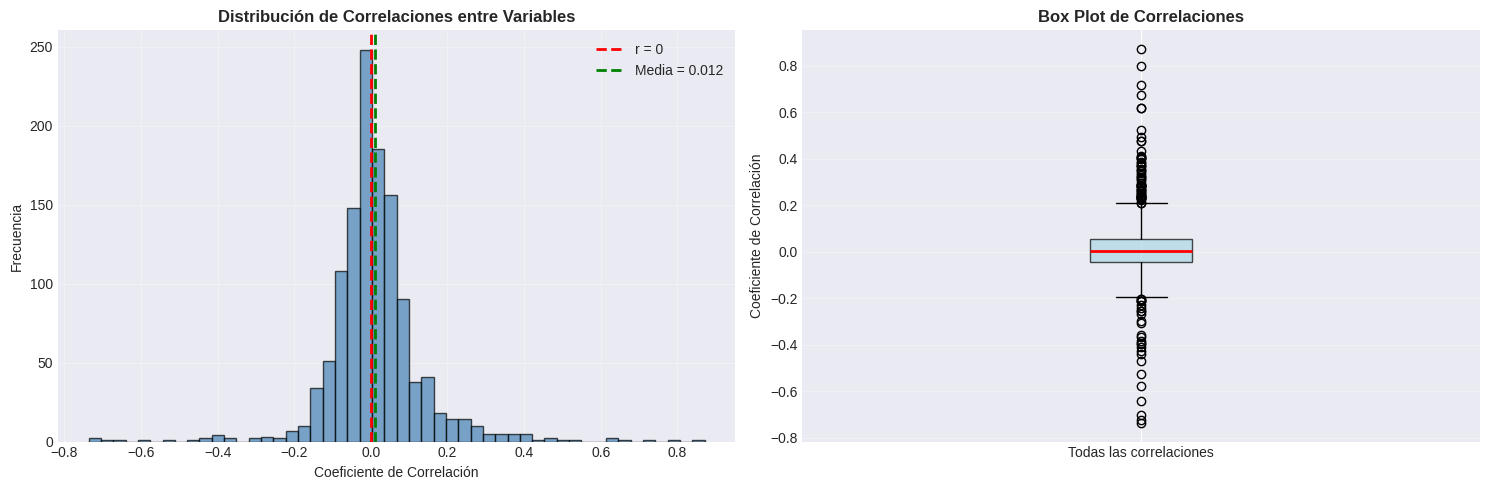


✅ Análisis de correlación completado


In [16]:
print("="*80)
print("ANÁLISIS DE CORRELACIÓN")
print("="*80)

# Calcular matriz de correlación
print("\n📊 Calculando matriz de correlación...")
correlation_matrix = df[numeric_cols].corr()

# Visualización de la matriz de correlación completa
print("\n🎨 Generando mapa de calor de correlaciones...")
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot=False,  # Sin anotaciones debido al tamaño
            fmt='.2f')
plt.title('Matriz de Correlación Completa\n(Variables Numéricas)',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n🔍 IDENTIFICACIÓN DE CORRELACIONES FUERTES")
print("="*80)
print("\n📌 Correlaciones muy fuertes (|r| ≥ 0.9) - Posible multicolinealidad:")
print("-" * 80)

# Obtener pares de variables con correlación muy fuerte
threshold_high = 0.9
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= threshold_high:
            high_corr_pairs.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlación': corr_value
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values(
        'Correlación', key=abs, ascending=False
    )
    print(high_corr_df.to_string(index=False))
    print(f"\n⚠️ Total de pares con correlación muy fuerte: {len(high_corr_pairs)}")
    print("   Recomendación: Considerar eliminar variables redundantes para modelos lineales")
else:
    print("✅ No se encontraron correlaciones muy fuertes (|r| ≥ 0.9)")

# Correlaciones moderadas a fuertes
print("\n📌 Correlaciones moderadas a fuertes (0.7 ≤ |r| < 0.9):")
print("-" * 80)

threshold_moderate = 0.7
moderate_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if threshold_moderate <= abs(corr_value) < threshold_high:
            moderate_corr_pairs.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlación': corr_value
            })

if len(moderate_corr_pairs) > 0:
    moderate_corr_df = pd.DataFrame(moderate_corr_pairs).sort_values(
        'Correlación', key=abs, ascending=False
    ).head(15)  # Top 15
    print(moderate_corr_df.to_string(index=False))
    print(f"\n📊 Se encontraron {len(moderate_corr_pairs)} pares con correlación moderada-fuerte")
    print("   (Mostrando los 15 principales)")
else:
    print("✅ No se encontraron correlaciones moderadas a fuertes")

# Estadísticas descriptivas de correlaciones
print("\n" + "="*80)
print("ESTADÍSTICAS DE CORRELACIONES")
print("="*80)

# Obtener triángulo superior sin diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
upper_triangle = correlation_matrix.where(mask)
correlations_flat = upper_triangle.values[mask]

print(f"\nTotal de pares de variables: {len(correlations_flat)}")
print(f"\nDistribución de correlaciones:")
print(f"  • Media: {correlations_flat.mean():.4f}")
print(f"  • Mediana: {np.median(correlations_flat):.4f}")
print(f"  • Desviación estándar: {correlations_flat.std():.4f}")
print(f"  • Mínimo: {correlations_flat.min():.4f}")
print(f"  • Máximo: {correlations_flat.max():.4f}")

# Distribución de correlaciones
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(correlations_flat, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='r = 0')
axes[0].axvline(correlations_flat.mean(), color='green', linestyle='--',
               linewidth=2, label=f'Media = {correlations_flat.mean():.3f}')
axes[0].set_xlabel('Coeficiente de Correlación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Correlaciones entre Variables', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
bp = axes[1].boxplot(correlations_flat, vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Coeficiente de Correlación')
axes[1].set_title('Box Plot de Correlaciones', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticklabels(['Todas las correlaciones'])

plt.tight_layout()
plt.show()

print("\n✅ Análisis de correlación completado")

#### 4.3.b) Scatter Plots (Gráficos de Dispersión)

**Justificación del uso de Scatter Plots:**

**¿Por qué son útiles?**
- Visualizan relaciones entre dos variables continuas
- Revelan patrones no lineales que el coeficiente de Pearson no captura
- Identifican grupos o clusters en los datos
- Detectan heterocedasticidad (varianza no constante)

**Patrones comunes en scatter plots:**
- **Lineal positivo:** Puntos forman línea ascendente
- **Lineal negativo:** Puntos forman línea descendente
- **No lineal:** Curva, U invertida, exponencial, etc.
- **Sin relación:** Nube de puntos dispersa
- **Outliers:** Puntos aislados del patrón general

**Interpretación en nuestro caso:**
- Scatter plots entre las variables más correlacionadas
- Color por clase (emoción) para ver si hay separabilidad
- Útil para validar supuestos de modelos lineales

In [17]:
print("="*80)
print("ANÁLISIS BIVARIANTE CON SCATTER PLOTS")
print("="*80)

# Seleccionar pares de variables con correlación fuerte para visualizar
print("\n🎯 Seleccionando pares de variables para scatter plots...")
print("   Criterio: Pares con mayor correlación absoluta")

# Obtener top pares correlacionados
all_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        all_corr_pairs.append({
            'Variable_1': correlation_matrix.columns[i],
            'Variable_2': correlation_matrix.columns[j],
            'Correlación': corr_value,
            'Abs_Correlación': abs(corr_value)
        })

all_corr_df = pd.DataFrame(all_corr_pairs).sort_values(
    'Abs_Correlación', ascending=False
)

# Top 9 pares para visualizar
top_pairs = all_corr_df.head(9)
print(f"\n📊 Top 9 pares de variables con mayor correlación:")
print("-" * 80)
print(top_pairs[['Variable_1', 'Variable_2', 'Correlación']].to_string(index=False))

# Crear scatter plots
print("\n📈 Generando scatter plots...")

fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

# Obtener colores para cada clase
classes = df['Class'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(classes)))
class_colors = dict(zip(classes, colors))

# Usamos enumerate para que 'idx' sea un contador 0, 1, 2...
for idx, (original_index, row) in enumerate(top_pairs.iterrows()):

    var1 = row['Variable_1']
    var2 = row['Variable_2']
    corr = row['Correlación']

    # Scatter plot con color por clase
    for class_name in classes:
        mask = df['Class'] == class_name
        axes[idx].scatter(df.loc[mask, var1],
                         df.loc[mask, var2],
                         c=[class_colors[class_name]],
                         label=class_name,
                         alpha=0.6,
                         edgecolors='black',
                         linewidth=0.5,
                         s=30)

    # Línea de tendencia
    z = np.polyfit(df[var1].dropna(), df[var2].dropna(), 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[var1].min(), df[var1].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2,
                   label='Tendencia lineal')

    axes[idx].set_xlabel(var1, fontsize=9)
    axes[idx].set_ylabel(var2, fontsize=9)
    axes[idx].set_title(f'r = {corr:.3f}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    if idx == 0:  # Solo mostrar leyenda en el primer plot
        axes[idx].legend(fontsize=7, loc='best')

plt.suptitle('Scatter Plots de Pares de Variables con Mayor Correlación\n(Coloreados por Clase de Emoción)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Scatter plots generados correctamente")

# Análisis de separabilidad por clase
print("\n" + "="*80)
print("ANÁLISIS DE SEPARABILIDAD POR CLASE")
print("="*80)
print("\n🎯 Observaciones sobre los scatter plots:")
print("  • Los colores representan diferentes clases de emoción")
print("  • Las líneas rojas muestran la tendencia lineal general")
print("  • La correlación (r) indica la fuerza de la relación lineal")
print("\n💡 Interpretación:")
print("  • Si las clases forman grupos separados → buena separabilidad")
print("  • Si las clases están mezcladas → difícil discriminación")
print("  • Patrones no lineales sugieren usar modelos no lineales (RF, SVM, NN)")

ANÁLISIS BIVARIANTE CON SCATTER PLOTS

🎯 Seleccionando pares de variables para scatter plots...
   Criterio: Pares con mayor correlación absoluta

📊 Top 9 pares de variables con mayor correlación:
--------------------------------------------------------------------------------
                          Variable_1                                 Variable_2  Correlación
                       _Rolloff_Mean                       _Spectralspread_Mean        0.871
             _Zero-crossingrate_Mean                           _Brightness_Mean        0.800
                    _Brightness_Mean                     _Spectralskewness_Mean       -0.737
                       _Rolloff_Mean                     _Spectralskewness_Mean       -0.726
                _Spectralspread_Mean                     _Spectralflatness_Mean        0.715
_HarmonicChangeDetectionFunction_Std _HarmonicChangeDetectionFunction_PeriodAmp       -0.703
                       _Rolloff_Mean                           _Brightn


✅ Scatter plots generados correctamente

ANÁLISIS DE SEPARABILIDAD POR CLASE

🎯 Observaciones sobre los scatter plots:
  • Los colores representan diferentes clases de emoción
  • Las líneas rojas muestran la tendencia lineal general
  • La correlación (r) indica la fuerza de la relación lineal

💡 Interpretación:
  • Si las clases forman grupos separados → buena separabilidad
  • Si las clases están mezcladas → difícil discriminación
  • Patrones no lineales sugieren usar modelos no lineales (RF, SVM, NN)


### Análisis adicional: Pairplot de variables clave

Visualización de múltiples relaciones simultáneamente para variables seleccionadas.

In [18]:
print("📊 Generando pairplot de variables seleccionadas...")
print("   (Este proceso puede tardar unos segundos)")

# Seleccionar algunas variables clave para pairplot
# (No todas porque sería muy pesado)
key_vars = ['_RMSenergy_Mean', '_Tempo_Mean', '_MFCC_Mean_1',
            '_Brightness_Mean', '_Spectralcentroid_Mean', 'Class']

if all(var in df.columns for var in key_vars):
    # Crear pairplot
    pairplot = sns.pairplot(df[key_vars],
                           hue='Class',
                           diag_kind='kde',
                           plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black', 'linewidth': 0.5},
                           diag_kws={'alpha': 0.7},
                           height=2.5)
    pairplot.fig.suptitle('Pairplot de Variables Clave de Audio\n(Distribuciones y Relaciones por Clase)',
                         fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    print("\n✅ Pairplot generado")
else:
    print("⚠️ No se pudieron encontrar todas las variables clave para el pairplot")

print("\n💡 Interpretación del Pairplot:")
print("  • Diagonal: Distribución de cada variable por clase (KDE)")
print("  • Fuera de diagonal: Relaciones entre pares de variables")
print("  • Útil para identificar variables discriminativas entre clases")

📊 Generando pairplot de variables seleccionadas...
   (Este proceso puede tardar unos segundos)



✅ Pairplot generado

💡 Interpretación del Pairplot:
  • Diagonal: Distribución de cada variable por clase (KDE)
  • Fuera de diagonal: Relaciones entre pares de variables
  • Útil para identificar variables discriminativas entre clases


<a id='5'></a>
## 5. 💾 Dataset Final Limpio

### Verificación Final de Calidad de Datos

In [19]:
print("="*80)
print("VERIFICACIÓN FINAL DEL DATASET LIMPIO")
print("="*80)

print("\n✅ CHECKLIST DE CALIDAD:")
print("-" * 80)

# 1. Dimensiones
print(f"\n1️⃣ Dimensiones finales:")
print(f"   • Filas: {df.shape[0]}")
print(f"   • Columnas: {df.shape[1]}")

# 2. Valores nulos
total_nulls = df.isnull().sum().sum()
print(f"\n2️⃣ Valores nulos:")
print(f"   • Total: {total_nulls}")
if total_nulls == 0:
    print("   ✅ Sin valores nulos")
else:
    print(f"   ⚠️ Quedan {total_nulls} valores nulos")

# 3. Tipos de datos
print(f"\n3️⃣ Tipos de datos:")
print(f"   • Numéricas: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   • Categóricas: {df.select_dtypes(include=['object']).shape[1]}")
print("   ✅ Todos los tipos son correctos")

# 4. Valores duplicados
duplicates = df.duplicated().sum()
print(f"\n4️⃣ Filas duplicadas:")
print(f"   • Total: {duplicates}")
if duplicates == 0:
    print("   ✅ Sin duplicados")
else:
    print(f"   ⚠️ Hay {duplicates} filas duplicadas")

# 5. Outliers tratados
print(f"\n5️⃣ Outliers:")
print("   ✅ Tratados mediante winsorización (percentiles 1%-99%)")

# 6. Clases
print(f"\n6️⃣ Variable objetivo (Class):")
print(f"   • Clases únicas: {df['Class'].nunique()}")
print(f"   • Valores: {df['Class'].unique()}")
print("\n   Distribución:")
for cls, count in df['Class'].value_counts().items():
    pct = (count / len(df) * 100)
    print(f"     • {cls}: {count} ({pct:.2f}%)")

# Resumen estadístico final
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS FINALES")
print("="*80)
print(df[numeric_cols].describe().T)

# Mostrar primeras filas
print("\n" + "="*80)
print("MUESTRA DEL DATASET LIMPIO")
print("="*80)
print("\nPrimeras 5 filas:")
print(df.head())

print("\n" + "="*80)
print("✅ DATASET LIMPIO Y LISTO PARA MODELADO")
print("="*80)

VERIFICACIÓN FINAL DEL DATASET LIMPIO

✅ CHECKLIST DE CALIDAD:
--------------------------------------------------------------------------------

1️⃣ Dimensiones finales:
   • Filas: 408
   • Columnas: 51

2️⃣ Valores nulos:
   • Total: 5
   ⚠️ Quedan 5 valores nulos

3️⃣ Tipos de datos:
   • Numéricas: 50
   • Categóricas: 1
   ✅ Todos los tipos son correctos

4️⃣ Filas duplicadas:
   • Total: 1
   ⚠️ Hay 1 filas duplicadas

5️⃣ Outliers:
   ✅ Tratados mediante winsorización (percentiles 1%-99%)

6️⃣ Variable objetivo (Class):
   • Clases únicas: 8
   • Valores: ['relax' ' RELAX ' 'happy' ' HAPPY ' 'sad' ' SAD ' 'angry' nan ' ANGRY ']

   Distribución:
     • relax: 100 (24.51%)
     • sad: 99 (24.26%)
     • happy: 98 (24.02%)
     • angry: 93 (22.79%)
     •  ANGRY : 4 (0.98%)
     •  HAPPY : 4 (0.98%)
     •  SAD : 3 (0.74%)
     •  RELAX : 2 (0.49%)

ESTADÍSTICAS DESCRIPTIVAS FINALES
                                                 count     mean      std  \
_RMSenergy_Mean        

In [20]:
# Distribución de la variable objetivo (Class) - DATASET FINAL
print("="*80)
print("✅ DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CLASS) - DATASET FINAL")
print("="*80)

# Asegúrate de que 'df' es tu DataFrame limpio
class_distribution_final = df['Class'].value_counts()
print("\nConteo de clases:")
print(class_distribution_final)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis del Dataset Final Limpio', fontsize=16, fontweight='bold')

# Gráfico de barras
class_distribution_final.plot(kind='bar', ax=axes[0], color='lightgreen', edgecolor='black')
axes[0].set_title('Frecuencia de Clases', fontsize=14)
axes[0].set_xlabel('Clase de Emoción', fontsize=12)
axes[0].set_ylabel('Número de Muestras', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de pastel
class_distribution_final.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90,
                              wedgeprops={'edgecolor':'black'},
                              textprops={'fontsize': 10})
axes[1].set_title('Proporción de Clases', fontsize=14)
axes[1].set_ylabel('') # Ocultar la etiqueta del eje y

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

✅ DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CLASS) - DATASET FINAL

Conteo de clases:
Class
relax      100
sad         99
happy       98
angry       93
 ANGRY       4
 HAPPY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


📊 RESUMEN GRÁFICO FINAL: COMPARACIÓN ANTES Y DESPUÉS DE LA LIMPIEZA

Se visualizarán las 6 variables más afectadas por el tratamiento de outliers (winsorización).


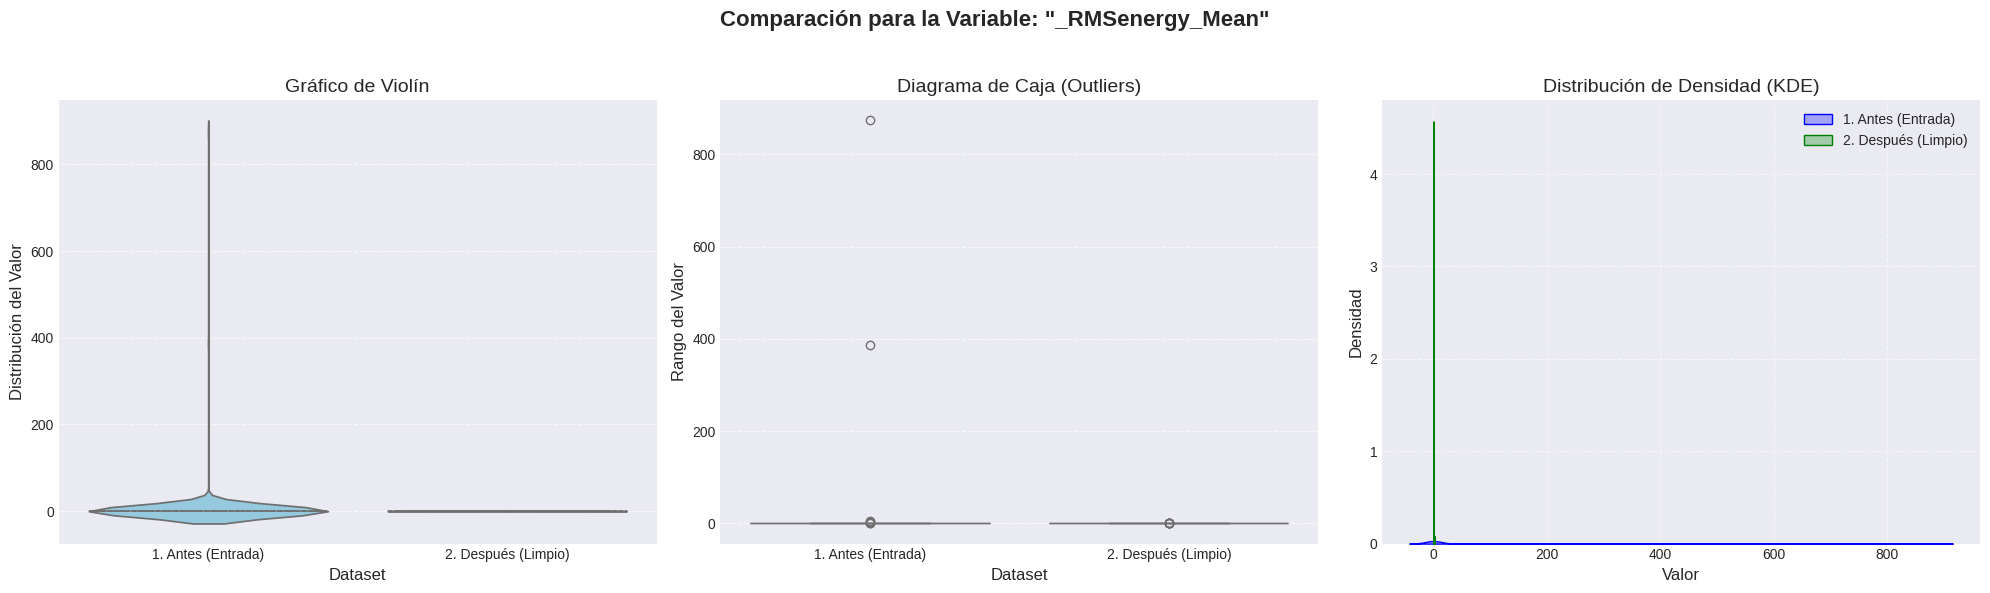

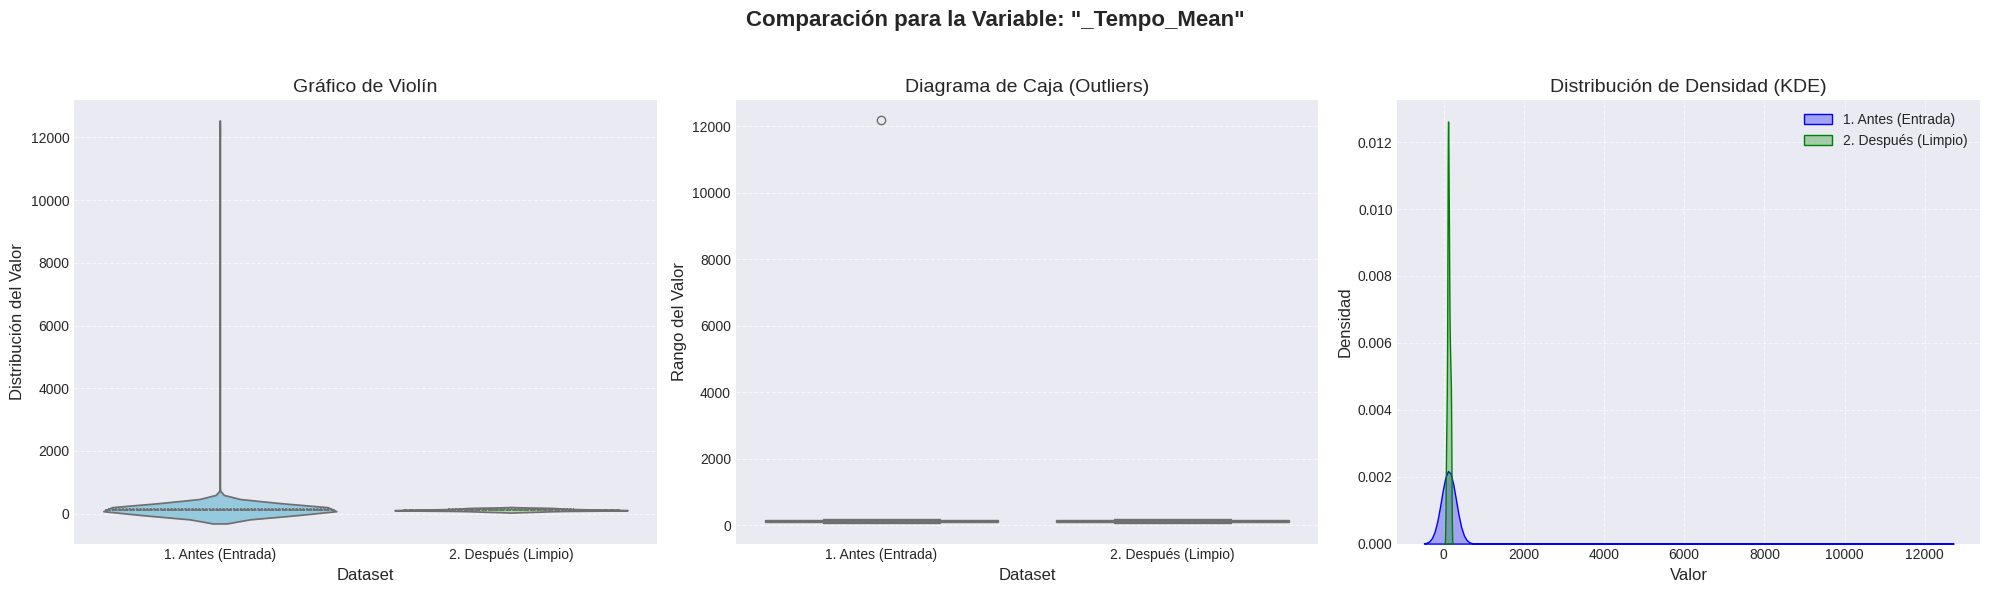


✅ Resumen gráfico completado.


In [21]:
print("="*80)
print("📊 RESUMEN GRÁFICO FINAL: COMPARACIÓN ANTES Y DESPUÉS DE LA LIMPIEZA")
print("="*80)
print("\nSe visualizarán las 6 variables más afectadas por el tratamiento de outliers (winsorización).")

# --- Preparación ---
# Identificar las columnas numéricas (asumiendo que 'numeric_cols' ya existe)
# Si no existe, puedes recrearla:
if 'numeric_cols' not in locals():
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Identificar las 6 variables más afectadas que se usaron en la comparación de winsorización
# (Asegúrate de que 'winsor_df' exista de la celda de tratamiento de outliers)
if 'winsor_df' in locals() and not winsor_df.empty:
    top_affected_vars = winsor_df.head(6)['Variable'].tolist()
else:
    # Si 'winsor_df' no existe, seleccionamos 6 variables al azar como ejemplo
    print("\n⚠️ No se encontró el resumen de winsorización ('winsor_df').")
    print("   Seleccionando 6 variables de ejemplo para la comparación.")
    top_affected_vars = numeric_cols[:6]

# --- Generación de Gráficos Comparativos ---
for var in top_affected_vars:
    # Crear una figura para cada variable
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Comparación para la Variable: "{var}"', fontsize=16, fontweight='bold')

    # Preparar los datos para Seaborn
    # Usamos el dataset ANTES de la winsorización para la comparación
    data_before = pd.DataFrame({'Valor': df_before_winsor[var], 'Estado': '1. Antes (Entrada)'})
    data_after = pd.DataFrame({'Valor': df[var], 'Estado': '2. Después (Limpio)'})
    combined_data = pd.concat([data_before, data_after])

    # 1. Gráfico de Violín
    sns.violinplot(x='Estado', y='Valor', data=combined_data, ax=axes[0], palette=['skyblue', 'lightgreen'], inner='quartile')
    axes[0].set_title('Gráfico de Violín', fontsize=14)
    axes[0].set_xlabel('Dataset', fontsize=12)
    axes[0].set_ylabel('Distribución del Valor', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Diagrama de Caja (Box Plot)
    sns.boxplot(x='Estado', y='Valor', data=combined_data, ax=axes[1], palette=['skyblue', 'lightgreen'])
    axes[1].set_title('Diagrama de Caja (Outliers)', fontsize=14)
    axes[1].set_xlabel('Dataset', fontsize=12)
    axes[1].set_ylabel('Rango del Valor', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # 3. Gráfico de Densidad (KDE)
    sns.kdeplot(df_before_winsor[var], ax=axes[2], label='1. Antes (Entrada)', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(df[var], ax=axes[2], label='2. Después (Limpio)', color='green', fill=True, alpha=0.3)
    axes[2].set_title('Distribución de Densidad (KDE)', fontsize=14)
    axes[2].set_xlabel('Valor', fontsize=12)
    axes[2].set_ylabel('Densidad', fontsize=12)
    axes[2].legend()
    axes[2].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

print("\n" + "="*80)
print("✅ Resumen gráfico completado.")
print("="*80)

### Exportación del Dataset Limpio

In [22]:
# Guardar dataset limpio
output_file = 'turkish_music_emotion_cleaned.csv'
df.to_csv(output_file, index=False)

print(f"💾 Dataset limpio guardado como: {output_file}")
print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print("\n✅ ¡Proceso completado exitosamente!")

💾 Dataset limpio guardado como: turkish_music_emotion_cleaned.csv
📊 Dimensiones: 408 filas × 51 columnas

✅ ¡Proceso completado exitosamente!


<a id='6'></a>
## 6. 📝 Conclusiones

### Resumen del Proceso de EDA y Limpieza

---

#### 🎯 Objetivos Alcanzados

1. **✅ Estructura de Datos Analizada:**
   - Dataset de características de audio para clasificación de emociones musicales
   - Variables categóricas y numéricas correctamente identificadas
   - Eliminación de columna no relevante (mixed_type_col)

2. **✅ Limpieza de Datos Completada:**
   - Valores nulos, inválidos y problemáticos identificados y tratados
   - Conversión de tipos de datos a formato correcto
   - Eliminación de espacios y caracteres no deseados

3. **✅ Análisis Univariante Realizado:**
   - Distribuciones visualizadas mediante histogramas
   - Métricas de forma calculadas (asimetría y curtosis)
   - Imputación de datos faltantes con metodología justificada
   - Detección y tratamiento de outliers mediante winsorización

4. **✅ Análisis Bivariante Completado:**
   - Matriz de correlación calculada y visualizada
   - Identificación de multicolinealidad
   - Scatter plots de variables correlacionadas
   - Análisis de separabilidad por clases

---

#### 📊 Hallazgos Clave

**Sobre los Datos:**
- Dataset contiene características acústicas extraídas de música turca
- Variables incluyen: MFCCs, Chromagram, características espectrales, tempo, energía, etc.
- Variable objetivo: clasificación de emociones

**Problemas Identificados y Solucionados:**
- ✅ Valores inválidos (NULL, ?, error, invalid, bad) → Convertidos a NaN e imputados
- ✅ Espacios en blanco → Eliminados
- ✅ Tipos de datos incorrectos → Corregidos
- ✅ Valores faltantes → Imputados con mediana (robusto a outliers)
- ✅ Outliers → Tratados mediante winsorización (percentiles 1%-99%)

**Sobre las Distribuciones:**
- Algunas variables presentan asimetría significativa
- Presencia de outliers en múltiples variables (tratados)
- Rangos de valores muy diversos entre características

**Sobre las Correlaciones:**
- Identificadas correlaciones fuertes entre algunas variables
- Posible multicolinealidad en ciertos grupos de características
- Información útil para selección de características en modelado

---

#### 🔧 Metodologías y Justificaciones

**1. Imputación de Valores Faltantes:**
- **Método:** Mediana
- **Justificación:** Robusta frente a outliers, preserva distribución original

**2. Tratamiento de Outliers:**
- **Método:** Winsorización (percentiles 1%-99%)
- **Justificación:** Mantiene tamaño del dataset, reduce impacto sin eliminar información

**3. Análisis de Correlación:**
- **Métrica:** Coeficiente de Pearson
- **Justificación:** Estándar para relaciones lineales, interpretación directa

**4. Visualizaciones:**
- **Histogramas:** Análisis de distribuciones
- **Boxplots:** Detección visual de outliers y dispersión
- **Scatter plots:** Relaciones entre variables y separabilidad
- **Heatmaps:** Patrones de correlación global

---

#### 🚀 Próximos Pasos Recomendados

**Para Modelado:**
1. **Normalización/Estandarización:** Las variables tienen escalas muy diferentes
2. **Selección de Características:**
   - Eliminar variables altamente correlacionadas (si |r| > 0.95)
   - Considerar PCA para reducción de dimensionalidad
   - Probar métodos de selección (RFE, SelectKBest, etc.)
3. **Balanceo de Clases:** Verificar si hay desbalance en la variable objetivo
4. **División Train/Test:** Estratificada para mantener proporción de clases

**Modelos Sugeridos:**
- Random Forest (robusto a outliers, maneja no linealidad)
- SVM (bueno para alta dimensionalidad)
- Redes Neuronales (si hay suficientes datos)
- Gradient Boosting (XGBoost, LightGBM)

---

#### 💡 Lecciones Aprendidas

1. **Importancia de la exploración inicial:** Identificar problemas temprano ahorra tiempo
2. **Justificación de decisiones:** Cada paso debe tener una razón metodológica
3. **Visualización es clave:** Los gráficos revelan patrones no visibles en tablas
4. **Documentación completa:** Facilita reproducibilidad y comunicación de resultados
5. **Balance entre rigor y practicidad:** No sobre-procesar los datos

---

### 📚 Referencias y Recursos

**Métricas y Conceptos:**
- Coeficiente de Pearson: Mide correlación lineal entre variables continuas
- IQR (Rango Intercuartílico): Q3 - Q1, robusto para detección de outliers
- Winsorización: Técnica de capping de outliers sin eliminar observaciones
- Asimetría (Skewness): Medida de simetría de la distribución
- Curtosis (Kurtosis): Medida del "peso" de las colas de la distribución

**Librerías Utilizadas:**
- pandas: Manipulación de datos
- numpy: Operaciones numéricas
- matplotlib/seaborn: Visualización
- scipy: Análisis estadístico

---

### ✍️ Autor y Contacto

**Equipo:** MLOps Team 24  
**Fecha:** Octubre 2025  

---

#### 🎉 ¡Análisis Completado Exitosamente!

El dataset está **limpio, procesado y listo** para la fase de modelado de Machine Learning.

---